# Model Learning

In [75]:
import pandas as pd


# Model 1 - 2018-2024 

stratified sampling, k cross fold validation not possible 

## Load Data

In [745]:
	
X_train = pd.read_csv('../data/train/train.csv')
Y_train = pd.read_csv('../data/train/train_labels.csv')

X_test = pd.read_csv('../data/test/test.csv')
Y_test = pd.read_csv('../data/test/test_labels.csv')


In [746]:
# Filter X_train and X_test for entries where the year is greater than 2018
X_train_2018 = X_train[X_train["year"] >= 2018]
X_test_2018 = X_test[X_test["year"] >= 2018]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2018 = Y_train[X_train["year"] >= 2018]
y_test_2018 = Y_test[X_test["year"] >= 2018]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2018.shape)
print("X_test_2018 shape:", X_test_2018.shape)
print("y_train_2018 shape:", y_train_2018.shape)
print("y_test_2018 shape:", y_test_2018.shape)

X_train_2018 shape: (2340, 80)
X_test_2018 shape: (579, 80)
y_train_2018 shape: (2340, 1)
y_test_2018 shape: (579, 1)


In [747]:
#bitte alle spalten anzeigen in der ausgabe wenn ich .head() mache

pd.set_option('display.max_columns', None)
X_train_2018.head()


,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres
32,25658,1086,855,51,24,12,2022,13,11,Hungarian Grand Prix,2022-07-31,13:00:00,2022-07-29,2022-07-29,2022-07-30,12:00:00,15:00:00,11:00:00,14:00:00,2022-07-30,Budapest,Hungary,47.5789,19.2486,264,1:18.973,1:18.573,\N,1999-05-30,Chinese,ZHO,22321.0,28218.0,25269.5,4169.808689,2.0,2.0,27.0,51.0,39.0,16.970563,175702.016848,162752.407312,55352.913854,125509.257466,28602.00,28602.00,22382.400000,254161.00,78973.0,78573.0,NaN,12.0,29610.400,29384.000000,82369.600000,271.400000,241.400000,245.600000,295.400000,5.000000,0.200000,29008.600000,28808.200000,80733.000000,277.200000,245.400000,253.600000,302.400000,4.000000,0.600000,36034.0,40389.0,106752.25,226.0,192.25,228.25,268.0,7.0,0.5
42,23849,992,840,3,18,10,2018,4,73,Azerbaijan Grand Prix,2018-04-29,12:10:00,\N,\N,\N,\N,\N,\N,\N,\N,Baku,Azerbaijan,40.3725,49.8533,-7,1:44.359,1:43.585,\N,1998-10-29,Canadian,STR,19737.0,21236.0,20486.5,1059.953065,2.0,2.0,23.0,40.0,31.5,12.020815,43337.994672,48607.189185,214057.503807,24715.081871,280942.00,280942.00,278273.200000,23443.10,104359.0,103585.0,NaN,11.0,38063.750,43613.916667,107780.750000,209.181818,219.083333,314.166667,304.333333,7.916667,0.583333,37850.625000,43418.000000,107211.625000,209.000000,218.000000,316.375000,308.250000,12.125000,0.375000,36420.0,41950.0,104123.00,226.0,228.00,323.00,309.0,2.0,1.0
69,25335,1071,846,1,4,5,2021,19,18,São Paulo Grand Prix,2021-11-14,17:00:00,2021-11-12,2021-11-13,\N,\N,\N,\N,\N,2021-11-12,São Paulo,Brazil,-23.7036,-46.6997,785,1:09.365,1:09.030,1:08.980,1999-11-13,British,NOR,17673.0,27313.0,21218.4,4332.633818,5.0,5.0,1.0,37.0,11.8,14.342245,157510.100539,74948.348083,169764.901144,220149.438203,22895.96,22895.96,78579.800000,188570.68,69365.0,69030.0,68980.0,8.0,18341.000,36669.000000,71593.200000,316.600000,260.200000,314.600000,317.800000,5.200000,0.800000,19149.307692,38185.846154,74560.538462,303.545455,253.000000,304.307692,300.769231,13.846154,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,25838,1096,848,3,23,19,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,2022-11-18,2022-11-18,2022-11-19,10:00:00,13:00:00,11:00:00,14:00:00,2022-11-19,Abu Dhabi,UAE,24.4672,54.6031,3,1:26.028,\N,\N,1996-03-23,Thai,ALB,21793.0,21798.0,21795.5,3.535534,2.0,2.0,12.0,35.0,23.5,16.263456,80600.518389,61043.839825,22299.215036,129262.906936,39867.60,39867.60,23569.400000,24986.40,86028.0,NaN,NaN,19.0,18237.125,38107.375000,89975.500000,288.333333,306.375000,209.875000,319.125000,7.250000,0.500000,17793.000000,37278.000000,87656.500000,289.500000,320.250000,209.750000,327.000000,3.750000,1.000000,17593.2,36934.4,86720.80,292.8,326.20,216.20,331.8,4.4,0.8
80,25346,1051,1,131,44,1,2021,20,78,Qatar Grand Prix,2021-11-21,14:00:00,2021-11-19,2021-11-19,2021-11-20,\N,\N,\N,\N,2021-11-20,Al Daayen,Qatar,25.4900,51.4542,12,1:21.901,1:21.682,1:20.827,1985-01-0

## Preprocessing

In [748]:
# Drop specified columns from train and test datasets
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date', 'q1', 'q2','q3','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2018 = X_train_2018.drop(columns=columns_to_drop)
X_test_2018 = X_test_2018.drop(columns=columns_to_drop)


In [749]:
# Drop the 'driver_nationality' column from both train and test datasets
X_train_2018 = X_train_2018.drop(columns=['driver_nationality'])
X_test_2018 = X_test_2018.drop(columns=['driver_nationality'])


### Calculating Age

In [750]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2018['race_date'] = pd.to_datetime(X_train_2018['race_date'])
X_train_2018['driver_dob'] = pd.to_datetime(X_train_2018['driver_dob'])

X_train_2018['age'] = X_train_2018.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2018 = X_train_2018.drop(columns=['driver_dob'])
X_train_2018 = X_train_2018.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2018['race_date'] = pd.to_datetime(X_test_2018['race_date'])
X_test_2018['driver_dob'] = pd.to_datetime(X_test_2018['driver_dob'])

X_test_2018['age'] = X_test_2018.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2018 = X_test_2018.drop(columns=['driver_dob'])
X_test_2018 = X_test_2018.drop(columns=['race_date'])

In [751]:
X_train_2018.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres,age
32,855,51,12,2022,13,11,47.5789,19.2486,264,22321.0,28218.0,25269.5,4169.808689,2.0,2.0,27.0,51.0,39.0,16.970563,175702.016848,162752.407312,55352.913854,125509.257466,28602.00,28602.00,22382.400000,254161.00,78973.0,78573.0,NaN,12.0,29610.400,29384.000000,82369.600000,271.400000,241.400000,245.600000,295.400000,5.000000,0.200000,29008.600000,28808.200000,80733.000000,277.200000,245.400000,253.600000,302.400000,4.000000,0.600000,36034.0,40389.0,106752.25,226.0,192.25,228.25,268.0,7.0,0.5,23
42,840,3,10,2018,4,73,40.3725,49.8533,-7,19737.0,21236.0,20486.5,1059.953065,2.0,2.0,23.0,40.0,31.5,12.020815,43337.994672,48607.189185,214057.503807,24715.081871,280942.00,280942.00,278273.200000,23443.10,104359.0,103585.0,NaN,11.0,38063.750,43613.916667,107780.750000,209.181818,219.083333,314.166667,304.333333,7.916667,0.583333,37850.625000,43418.000000,107211.625000,209.000000,218.000000,316.375000,308.250000,12.125000,0.375000,36420.0,41950.0,104123.00,226.0,228.00,323.00,309.0,2.0,1.0,19
69,846,1,5,2021,19,18,-23.7036,-46.6997,785,17673.0,27313.0,21218.4,4332.633818,5.0,5.0,1.0,37.0,11.8,14.342245,157510.100539,74948.348083,169764.901144,220149.438203,22895.96,22895.96,78579.800000,188570.68,69365.0,69030.0,68980.0,8.0,18341.000,36669.000000,71593.200000,316.600000,260.200000,314.600000,317.800000,5.200000,0.800000,19149.307692,38185.846154,74560.538462,303.545455,253.000000,304.307692,300.769231,13.846154,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
71,848,3,19,2022,22,24,24.4672,54.6031,3,21793.0,21798.0,21795.5,3.535534,2.0,2.0,12.0,35.0,23.5,16.263456,80600.518389,61043.839825,22299.215036,129262.906936,39867.60,39867.60,23569.400000,24986.40,86028.0,NaN,NaN,19.0,18237.125,38107.375000,89975.500000,288.333333,306.375000,209.875000,319.125000,7.250000,0.500000,17793.000000,37278.000000,87656.500000,289.500000,320.250000,209.750000,327.000000,3.750000,1.000000,17593.2,36934.4,86720.80,292.8,326.20,216.20,331.8,4.4,0.8,26
80,1,131,1,2021,20,78,25.4900,51.4542,12,25235.0,25381.0,25308.0,103.237590,2.0,2.0,18.0,42.0,30.0,16.970563,98346.355345,113766.891519,55567.688234,221039.458213,332055.90,332055.90,55567.688234,430743.30,81901.0,81682.0,80827.0,1.0,28504.000,28781.333333,87123.666667,238.166667,277.666667,289.000000,309.666667,5.000000,0.666667,28143.444444,28806.888889,85931.333333,238.888889,274.333333,297.666667,304.111111,7.222222,0.444444,27119.2,27627.0,82959.80,246.6,271.80,309.00,315.8,4.6,0.4,36


## Encoding

Jetzt nicht mehr ntig

#### Encoding ohne NaN hoffentlich

In [525]:
# Encode object columns with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


#
# 
# object_columns = X_train_2018.select_dtypes(include=['object']).columns

from sklearn import preprocessing

# Identifiziere die Spalten mit Objektdatentypen
object_columns = X_train_2018.select_dtypes(include=['object']).columns

# Initialisiere den OneHotEncoder mit handle_unknown='ignore'
encoderOH = OneHotEncoder(handle_unknown='ignore')

# Verwende ColumnTransformer, um die Transformationen konsistent anzuwenden
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoderOH, object_columns)
    ],
    remainder='passthrough'
)

# Passe den ColumnTransformer auf die Trainingsdaten an und transformiere die Trainingsdaten
X_train_2018_transformed = preprocessor.fit_transform(X_train_2018)
X_test_2018_transformed = preprocessor.transform(X_test_2018)

# Konvertiere die transformierten Daten zurück in DataFrames
X_train_2018 = pd.DataFrame(X_train_2018_transformed, columns=preprocessor.get_feature_names_out())
X_test_2018 = pd.DataFrame(X_test_2018_transformed, columns=preprocessor.get_feature_names_out())

#### Encoding 2 mit NaN woher auch immer

In [292]:
# Encode object columns with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


object_columns = X_train_2018.select_dtypes(include=['object']).columns

from sklearn import preprocessing

encoderOH = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoded_train_2018 = pd.DataFrame(encoderOH.fit_transform(X_train_2018[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
encoded_test_2018 = pd.DataFrame(encoderOH.transform(X_test_2018[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
X_train_2018 = X_train_2018.drop(columns=object_columns).join(encoded_train_2018)
X_test_2018 = X_test_2018.drop(columns=object_columns).join(encoded_test_2018)

In [337]:
display(object_columns)

Index(['driver_nationality'], dtype='object')

In [338]:
X_train_2018.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres,age
32,855,51,12,2022,13,11,47.5789,19.2486,264,22321.0,28218.0,25269.5,4169.808689,2.0,2.0,27.0,51.0,39.0,16.970563,175702.016848,162752.407312,55352.913854,125509.257466,28602.00,28602.00,22382.400000,254161.00,78973.0,78573.0,NaN,12.0,29610.400,29384.000000,82369.600000,271.400000,241.400000,245.600,295.400000,5.00,0.200000,29008.600000,28808.200000,80733.000000,277.200000,245.400000,253.600000,302.400000,4.000000,0.600000,36034.0,40389.00,106752.25,226.00,192.25,228.25,268.00,7.0,0.50,23
69,846,1,5,2021,19,18,-23.7036,-46.6997,785,17673.0,27313.0,21218.4,4332.633818,5.0,5.0,1.0,37.0,11.8,14.342245,157510.100539,74948.348083,169764.901144,220149.438203,22895.96,22895.96,78579.800000,188570.68,69365.0,69030.0,68980.0,8.0,18341.000,36669.000000,71593.200000,316.600000,260.200000,314.600,317.800000,5.20,0.800000,19149.307692,38185.846154,74560.538462,303.545455,253.000000,304.307692,300.769231,13.846154,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
71,848,3,19,2022,22,24,24.4672,54.6031,3,21793.0,21798.0,21795.5,3.535534,2.0,2.0,12.0,35.0,23.5,16.263456,80600.518389,61043.839825,22299.215036,129262.906936,39867.60,39867.60,23569.400000,24986.40,86028.0,NaN,NaN,19.0,18237.125,38107.375000,89975.500000,288.333333,306.375000,209.875,319.125000,7.25,0.500000,17793.000000,37278.000000,87656.500000,289.500000,320.250000,209.750000,327.000000,3.750000,1.000000,17593.2,36934.40,86720.80,292.80,326.20,216.20,331.80,4.4,0.80,26
80,1,131,1,2021,20,78,25.4900,51.4542,12,25235.0,25381.0,25308.0,103.237590,2.0,2.0,18.0,42.0,30.0,16.970563,98346.355345,113766.891519,55567.688234,221039.458213,332055.90,332055.90,55567.688234,430743.30,81901.0,81682.0,80827.0,1.0,28504.000,28781.333333,87123.666667,238.166667,277.666667,289.000,309.666667,5.00,0.666667,28143.444444,28806.888889,85931.333333,238.888889,274.333333,297.666667,304.111111,7.222222,0.444444,27119.2,27627.00,82959.80,246.60,271.80,309.00,315.80,4.6,0.40,36
93,807,210,6,2024,18,15,1.2914,103.8640,18,29808.0,29808.0,29808.0,0.000000,1.0,1.0,29.0,29.0,29.0,0.000000,59485.009119,80163.762376,30910.336323,143935.685393,32274.20,32274.20,31303.000000,28950.60,90724.0,90150.0,90115.0,6.0,28369.500,40544.750000,96315.750000,297.500000,266.750000,245.875,288.714286,8.75,0.250000,27622.000000,39104.250000,92979.500000,309.750000,277.250000,248.250000,297.750000,3.500000,1.000000,27280.5,38762.25,91875.25,312.25,279.00,258.25,300.75,3.5,0.75,37


In [326]:
# Zeige alle Einträge bei driver_nationality_Thai, die NaN-Werte haben
nan_entries_thai = X_train_2018[X_train_2018['cat__driver_nationality_Thai'].isna()]
display(nan_entries_thai)

KeyError: 'cat__driver_nationality_Thai'

In [752]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_2018)
y_train_2018 = label_encoder.fit_transform(y_train_2018)
y_test_2018 = label_encoder.transform(y_test_2018)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## Normalisation

Ckeck ob es was bringt

In [753]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
X_train_2018 = min_max_scaler.fit_transform(X_train_2018)
X_test_2018 = min_max_scaler.transform(X_test_2018)

## Learning the Modell

### Random Forrest

In [341]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren
random_forest.fit(X_train_2018, y_train_2018) #Lernvorgang des Modells



RandomForestClassifier(max_depth=2, random_state=0)

In [342]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
X_rf_pred = random_forest.predict(X_test_2018)

# Zeige die Vorhersagen
print(X_rf_pred)

[13  8  5 13 13 13 19 13  8  2  5  5 13 11  1 13 13  0  2  8 13  1  7  1
  1  5  8  8  5 19  0  1  0 13  0 13 13 13 13 13 13  1 13  1  5 13  1  5
  2 13  5  1 13  1 13  5 13 19  0  8  0 19  0 13 13  0 13 19 12 19 13  3
 13 19  1 19 19  0 16 13  0 13 13  5 12 13  5  1 13  1  0  5 13  0  5 13
  5  0  8 13  1 13  8 13  1 13 13 13 13 13  5  8  0 13 12  0  5 19 13  2
  1  1 13  1 13 13 13 12 13 19 13  5 13  5 19  2 13  0 19 19 16 13  5  1
  1  5  0 13 13  1 13  5 13  1  1  0  1  1 13 13  8  5  0  0 13  1 13 13
 13  0 13  5  0  1 19  1 14 13 12 19 13 13 13  5 13 13 19 13 19  1 19  5
 19 13 19  8 13 13 13 13 13  1 13 13 13 13  5  8  8 13 13 13 13  5  5 13
  0 13 13  5 13  5 13 13 13 13  5 19 13 13 19  1 13  8 13 13 19 13  0  8
  5 13 13  1  8 13 12  8 13  5 12 12 13 13 13 13  8 13 13  0 13  0 13  1
  0 13 13 13  5  1  0  5  0 13 13 13  2 13 13 13  5  5  5 13  1 13  1 13
  0  5  0 13 13  8 13 13 19 13 13 16  0  0  0 13  1  1 13  1 13 13 13  8
 13  0 19  5 13 13 13  5 13 13  0  8  1  5 13  1  0

In [343]:
# Berechnung des mse der prediction
from sklearn.metrics import mean_squared_error
x_mse = mean_squared_error(y_test_2018, X_rf_pred)
print("Mean Squared Error:", x_mse)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse))


Mean Squared Error: 23.018595041322314
Root Mean Squared Error: 4.797769798700466


#### Hyperparameter Tuning via Successive Halving

In [532]:
#Dauert 2 min 30 sek
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingRandomSearchCV

rng = np.random.RandomState(0)

clf = RandomForestClassifier( random_state=rng)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}
#Stratified K-Fold Cross Validation -> Lief besser mit KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng,cv=skf, scoring='neg_mean_squared_error')

# Beste Parameter und Score

rf_rsh.fit(X_train_2018, y_train_2018)

print("Beste Parameter für Random Forest:", rf_rsh.best_params_)
print("Bester Score für Random Forest:", sqrt(-rf_rsh.best_score_))

Beste Parameter für Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30}
Bester Score für Random Forest: 4.647781728954147


In [49]:
#Import classification report

from sklearn.metrics import classification_report

# Beste Parameter und Score
print("Beste Parameter:", rf_rsh.best_params_)
print("Bester Score:", rf_rsh.best_score_)

# Vorhersagen und Bewertung
X_rf_sh_pred = rf_rsh.predict(X_test_2018)
print("Classification Report:")
print(classification_report(y_test_2018, X_rf_sh_pred, target_names=label_encoder.classes_.astype(str)))

Beste Parameter: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30}
Bester Score: 0.10124999999999999
Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.39      0.38        28
           2       0.23      0.29      0.25        24
           3       0.14      0.19      0.16        27
           4       0.21      0.11      0.15        27
           5       0.22      0.13      0.16        31
           6       0.14      0.24      0.17        21
           7       0.03      0.05      0.04        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        19
          11       0.14      0.06      0.09        32
          12       0.00      0.00      0.00        23
          13       0.00      0.00      0.00        23
          14       0.06      0.09      0.07        23
       

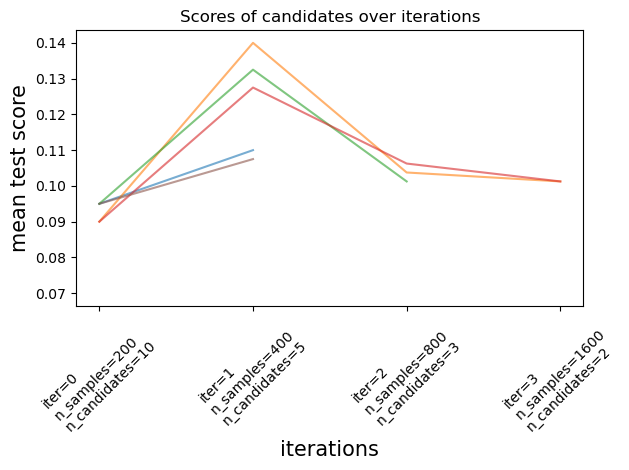

In [50]:
results = pd.DataFrame(rf_rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rf_rsh.n_resources_[i]}\nn_candidates={rf_rsh.n_candidates_[i]}"
    for i in range(rf_rsh.n_iterations_)
]

ax.set_xticks(range(rf_rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)

plt.tight_layout()
plt.show()

In [52]:
# Berechnung des mse der prediction
from sklearn.metrics import mean_squared_error
x_mse_sh = mean_squared_error(y_test_2018, X_rf_sh_pred)
print("Mean Squared Error:", x_mse_sh)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_sh))

Mean Squared Error: 19.919421487603305
Root Mean Squared Error: 4.463117911012805


### XG Boost

In [26]:
# XGBoost trainieren
import xgboost as xgb

clf_xg = xgb.XGBClassifier(random_state=42)
clf_xg.fit(X_train_2018, y_train_2018)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
# Prediction
X_pred_xg = clf_xg.predict(X_test_2018)
print(X_pred_xg)

[18  5  6  6 12 11  3 11  8  3  6  6 18  8  3  8 16  0  4  9  7  4  4  0
  5  5 12  9  6 19  2  5  2 19  0 18  9 12 16 12 13  1 11  3  6 17  4  5
  5  9  3 10 13  2 16  5  7 18  1  5  0 19  2 16 13  0 12 19  8 19 10  4
 11 19  0 19 18  3 15  9  6  7  2 18  8 18  6  1 17  3  0 17 16  1  5 14
  3  1  5 12 15 16  6 14  2 11 11 16  7 14  5  7  1 16 11  0 19 16 15  7
  6  3 16  4 14 18 13 16  9 19  7  6 13  6 19  0  5  1 19 16 16 11 19  3
  3  5  1 16 16  2  7 19 12  2  1  0  8  3  7 17  6  6  1  2 14  2 17 15
 11  3 19 10  0 16 18  1  3  9  6 19  7 13 17  4 10 16 19  8 19  5 19  9
 18 11 18 13 18 16 15 14 18  4  7 12 16 11  9  3  6 10 12  9 18  6 10 10
  2 16  7  5 15  4 11 19 15 11 10 19  7 13 19  3 17 12  9 13 19 14  1 10
  9 12  9  2  9  9  6 14 17  3 10 13 16 10 17 12  9  5 18  1 15  3 13 14
  2  8 10 13  5  3  0  4  1 12 15 15  4  7 15 12  3 11  4 18  3 18  3 10
  3  3  1 12 13  5 18 13 19 17 12 15  2  0  2 14  2  2 18  3  9 12 11  9
 16  3 19  9  8 17 16  5  8 16  0  7  4  5 15 16  2

In [30]:
# Berechnung des mse der prediction
from sklearn.metrics import mean_squared_error
x_mse_xg = mean_squared_error(y_test_2018, X_pred_xg)
print("Mean Squared Error:", x_mse_xg)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_xg))

Mean Squared Error: 19.035123966942148
Root Mean Squared Error: 4.362926078555784


#### Hyperparameter Tuning via successive halving

In [529]:
#Dauert so 2 min 30 sek

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

# Successive Halving Hyperparameter Tuning for XGBoost

# Definiere das Modell
xgb_clf = xgb.XGBClassifier(random_state=0)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#K-Fold Cross Validation

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb = HalvingRandomSearchCV(
    estimator=xgb_clf, param_distributions=param_dist_xgb, factor=2, random_state=0, cv=skf, scoring='neg_mean_squared_error'
)

rsh_xgb.fit(X_train_2018, y_train_2018)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb.best_params_)
print("Bester Score für XGBoost:", sqrt(-rsh_xgb.best_score_))
#4.71559

# Vorhersagen und Bewertung
X_xgb_sh_pred = rsh_xgb.predict(X_test_2018)
print("Classification Report für XGBoost:")
print(classification_report(y_test_2018, X_xgb_sh_pred, target_names=label_encoder.classes_.astype(str)))

Beste Parameter für XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Bester Score für XGBoost: -22.236875
Classification Report für XGBoost:
              precision    recall  f1-score   support

           1       0.44      0.38      0.41        32
           2       0.16      0.17      0.16        30
           3       0.13      0.18      0.15        33
           4       0.08      0.09      0.09        32
           5       0.00      0.00      0.00        33
           6       0.07      0.08      0.08        25
           7       0.04      0.03      0.04        29
           8       0.03      0.04      0.04        24
           9       0.00      0.00      0.00        24
          10       0.03      0.04      0.03        24
          11       0.06      0.05      0.06        38
          12       0.06      0.07      0.06        30
          13       0.00      0.00      0.00        30
          14       0.22      0.21      

In [58]:
# Berechnung des mse der prediction
from sklearn.metrics import mean_squared_error
x_mse_xg_sh = mean_squared_error(y_test_2018, X_xgb_sh_pred)
print("Mean Squared Error:", x_mse_xg_sh)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_xg_sh))

Mean Squared Error: 19.18595041322314
Root Mean Squared Error: 4.380176984235128


#### Hyperparameter tuning via randomized search 

In [754]:
#dauert 17 min 5 sek
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisiere den XGBoost Classifier
xgb = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [ 150, 250],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [ 0.8, 0.9, 1.0],
    'colsample_bytree': [ 0.75, 0.85]
}

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV mit K-Fold Cross-Validation
random_search2018 = RandomizedSearchCV(
    estimator=xgb, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search2018.fit(X_train_2018, y_train_2018)

# Beste Parameter und Score
print("Beste Parameter:", random_search2018.best_params_)
print("Bester Score:", sqrt(-random_search2018.best_score_))

# Beim Classification Report kann noch noch der Parameter zero_division hinzugefügt werden um das Verhalten bei undefinierten Präzisions- und Recall Werten zu steuern
# Vorhersagen und Bewertung
X_xgb_rs_pred = random_search2018.predict(X_test_2018)
X_xgb_rs_pred_original = label_encoder.inverse_transform(X_xgb_rs_pred)
print("Classification Report:")
print(classification_report(y_test_2018, X_xgb_rs_pred_original))

# Berechne den RMSE auf dem Test-Set
test_mse = mean_squared_error(y_test_2018, X_xgb_rs_pred)
test_rmse = sqrt(test_mse)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", test_rmse)

Beste Parameter: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.75}
Bester Score: 4.449959185446171
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.33      0.30      0.32        30
           2       0.26      0.30      0.28        33
           3       0.20      0.25      0.22        32
           4       0.21      0.18      0.19        33
           5       0.21      0.20      0.20        25
           6       0.21      0.24      0.22        29
           7       0.06      0.08      0.07        24
           8       0.06      0.08      0.07        24
           9       0.26      0.29      0.27        24
          10       0.12      0.08      0.10        38
          11       0.16      0.20      0.18        30
          12       0.17      0.20      0.18        30
          13       0.23      0.25      0.24        28
          14

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/op

In [755]:
import pickle

with open("random_search2018.pkl",'wb') as file: 
    pickle.dump(random_search2018, file)


### Hist Gradient Boosting

In [123]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc.fit(X_train_2018, y_train_2018)

# Vorhersagen auf Testdaten
X_pred_hgb_2018 = hgbc.predict(X_test_2018)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_2018, X_pred_hgb_2018, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.41      0.43      0.42        28
           2       0.10      0.12      0.11        24
           3       0.07      0.07      0.07        27
           4       0.15      0.15      0.15        27
           5       0.00      0.00      0.00        31
           6       0.16      0.24      0.19        21
           7       0.05      0.09      0.06        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.11      0.16      0.13        19
          11       0.05      0.03      0.04        32
          12       0.04      0.04      0.04        23
          13       0.06      0.04      0.05        23
          14       0.09      0.09      0.09        23
          15       0.04      0.04      0.04        25
          16       0.07      0.04      0.05        27
          17       0.06      0.08      0.07        24
          18       0.20    

In [124]:
#RMSE für HistGradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

# Berechnung des mse der prediction
x_mse_hgb = mean_squared_error(y_test_2018, X_pred_hgb_2018)
print("Mean Squared Error HGB:", x_mse_hgb)
print("Root Mean Squared Error HGB:", sqrt(x_mse_hgb))


Mean Squared Error HGB: 19.762396694214875
Root Mean Squared Error HGB: 4.445491726931327


### Gradient Boost mit Imputer

In [125]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Modell trainieren
pipeline.fit(X_train_2018, y_train_2018)

# Vorhersagen auf Testdaten
X_pred_gb_2018 = pipeline.predict(X_test_2018)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_2018, X_pred_gb_2018, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.63      0.43      0.51        28
           2       0.19      0.29      0.23        24
           3       0.05      0.07      0.06        27
           4       0.24      0.19      0.21        27
           5       0.12      0.06      0.09        31
           6       0.14      0.19      0.16        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.05      0.05      0.05        19
          11       0.05      0.03      0.04        32
          12       0.10      0.13      0.12        23
          13       0.06      0.04      0.05        23
          14       0.00      0.00      0.00        23
          15       0.08      0.08      0.08        25
          16       0.18      0.11      0.14        27
          17       0.12      0.12      0.12        24
          18       0.07    

In [126]:

# Berechnung des mse der prediction
x_mse_gb = mean_squared_error(y_test_2018, X_pred_gb_2018)
print("Mean Squared Error GB:", x_mse_gb)
print("Root Mean Squared Error GB:", sqrt(x_mse_gb))

Mean Squared Error HGB: 22.177685950413224
Root Mean Squared Error HGB: 4.709319053792514


### KNN

In [129]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem KNeighborsClassifier
pipelineknn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Modell trainieren
pipelineknn.fit(X_train_2018, y_train_2018)

# Vorhersagen auf Testdaten
X_pred_knn_2018 = pipelineknn.predict(X_test_2018)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_2018, X_pred_knn_2018, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.07      0.21      0.10        28
           2       0.02      0.04      0.02        24
           3       0.04      0.07      0.05        27
           4       0.03      0.04      0.03        27
           5       0.00      0.00      0.00        31
           6       0.03      0.05      0.03        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        32
          12       0.17      0.04      0.07        23
          13       0.08      0.04      0.06        23
          14       0.17      0.04      0.07        23
          15       0.00      0.00      0.00        25
          16       0.29      0.07      0.12        27
          17       0.17      0.04      0.07        24
          18       0.00    

In [130]:
# Berechnung des mse der prediction
x_mse_knn = mean_squared_error(y_test_2018, X_pred_knn_2018)
print("Mean Squared Error KNN:", x_mse_knn)
print("Root Mean Squared Error KNN:", sqrt(x_mse_knn))

Mean Squared Error KNN: 52.646694214876035
Root Mean Squared Error KNN: 7.255804174237066


## Ensemble

In [107]:

from sklearn.metrics import accuracy_score

def evaluate_classifier(e_name, e, X_train, y_train, X_test, y_test):
    y_pred = e.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f'{e_name}: ACC={acc:.2f}', f'{e_name}: RMSE={rmse:.2f}')


In [43]:

#Dauert 6 Min

#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier

estimators = {'RandomForrest with Successive Halving': rf_rsh, 'XG Boost Classifier': clf_xg} #Possible to extend to even more classifiers

#encoder = LabelEncoder()
#df1_target_train_encoded = encoder.fit_transform(df1_target_train)
#df1_target_test_encoded = encoder.transform(df1_target_test)

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, X_train_2018, y_train_2018, X_test_2018, y_test_2018)

RandomForrest with Successive Halving: ACC=0.12 RandomForrest with Successive Halving: RMSE=4.55
XG Boost Classifier: ACC=0.10 XG Boost Classifier: RMSE=4.36
Stacking: ACC=0.10 Stacking: RMSE=4.36


In [48]:
#Visualize the stacking calssifier decision tree to see how the meta learner is making decisions
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(ensemble, feature_names=estimators, 
               class_names=label_encoder.classes_)
plt.show()


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got StackingClassifier(classifiers=[HalvingRandomSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                                      estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x141E13840),
                                                      factor=2,
                                                      param_distributions={'max_depth': [None,
                                                                                         10,
                                                                                         20,
                                                                                         30],
                                                                           'max_features': [None,
                                                                                            'sqrt',
                                                                                            'log2',
                                                                                            0.5,
                                                                                            0.75],
                                                                           'min_samples_leaf': [1,
                                                                                                2,
                                                                                                4],
                                                                           'min_samples_split': [2,
                                                                                                 5,
                                                                                                 10],
                                                                           'n_est...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)],
                   meta_classifier=DecisionTreeClassifier()) instead.

<Figure size 2000x1000 with 0 Axes>

# Modell 2 - Daten 1950-2018

Folgende Probleme: Viele NaN Werte bei Position

Welche attribute sollen wir nehmen? Es gibt quasi keine vernünftigen wie standings etc.

## Load Data

In [840]:
	
X_train_1950 = pd.read_csv('../data/train/train.csv')
y_train_1950 = pd.read_csv('../data/train/train_labels.csv')

X_test_1950 = pd.read_csv('../data/test/test.csv')
y_test_1950 = pd.read_csv('../data/test/test_labels.csv')


In [841]:
# Filter X_train and X_test for entries where the year is greater than 2018
#X_train_1950 = X_train[X_train["year"] <= 2018]
#X_test_1950 = X_test[X_test["year"] <= 2018]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
#y_train_1950 = Y_train[X_train["year"] <= 2018]
#y_test_1950 = Y_test[X_test["year"] <= 2018]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_1950.shape)
print("X_test_2018 shape:", X_test_1950.shape)
print("y_train_2018 shape:", y_train_1950.shape)
print("y_test_2018 shape:", y_test_1950.shape)

X_train_2018 shape: (21359, 80)
X_test_2018 shape: (5340, 80)
y_train_2018 shape: (21359, 1)
y_test_2018 shape: (5340, 1)


In [842]:
X_train_1950.head()

,resultId,raceId,driverId,constructorId,number,grid,year,round,circuitId,race_name,race_date,race_time,fp1_date,fp2_date,fp3_date,fp1_time,fp2_time,fp3_time,quali_time,quali_date,race_location,race_country,race_lat,race_lng,race_alt,q1,q2,q3,driver_dob,driver_nationality,driver_code,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres
0,15023,607,235,6,8,11,1973,3,30,South African Grand Prix,1973-03-03,\N,\N,\N,\N,\N,\N,\N,\N,\N,Midrand,South Africa,-25.9894,28.07670,1460,NaN,NaN,NaN,1945-01-01,Belgian,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20330,337,17,9,6,6,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,\N,\N,\N,\N,\N,\N,\N,\N,Sakhir,Bahrain,26.0325,50.51060,7,1:55.298,1:54.318,1:55.284,1976-08-27,Australian,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19629,816,640,105,58,9,1953,9,14,Italian Grand Prix,1953-09-13,\N,\N,\N,\N,\N,\N,\N,\N,\N,Monza,Italy,45.6156,9.28111,162,NaN,NaN,NaN,1914-05-18,Swiss,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20914,846,813,3,12,8,2011,6,6,Monaco Grand Prix,2011-05-29,12:00:00,\N,\N,\N,\N,\N,\N,\N,\N,Monte-Carlo,Monaco,43.7347,7.42056,7,1:15.819,1:15.545,1:16.528,1985-03-09,Venezuelan,MAL,25687.0,26468.0,26077.5,552.250396,2.0,2.0,25.0,54.0,39.5,20.506097,22356.805444,48638.57573,78966.203597,23493.582866,21056.7,21056.7,30185.1,21292.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20167,839,791,6,22,25,1950,7,14,Italian Grand Prix,1950-09-03,\N,\N,\N,\N,\N,\N,\N,\N,\N,Monza,Italy,45.6156,9.28111,162,NaN,NaN,NaN,1898-08-18,Italian,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [843]:
# Drop specified columns from train and test datasets
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date', 'q1', 'q2','q3','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_1950 = X_train_1950.drop(columns=columns_to_drop)
X_test_1950 = X_test_1950.drop(columns=columns_to_drop)


In [844]:

#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_1950 = X_train_1950.drop(columns=X_train_1950.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_1950 = X_test_1950.drop(columns=X_test_1950.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)

In [845]:
# Drop the 'driver_nationality' column from both train and test datasets
X_train_1950 = X_train_1950.drop(columns=['driver_nationality'])
X_test_1950 = X_test_1950.drop(columns=['driver_nationality'])


In [846]:
X_train_1950.head()

,driverId,constructorId,grid,year,round,circuitId,race_date,race_lat,race_lng,race_alt,driver_dob
0,235,6,11,1973,3,30,1973-03-03,-25.9894,28.07670,1460,1945-01-01
1,17,9,6,2010,1,3,2010-03-14,26.0325,50.51060,7,1976-08-27
2,640,105,9,1953,9,14,1953-09-13,45.6156,9.28111,162,1914-05-18
3,813,3,8,2011,6,6,2011-05-29,43.7347,7.42056,7,1985-03-09
4,791,6,25,1950,7,14,1950-09-03,45.6156,9.28111,162,1898-08-18


### Calculate Driver Age

In [847]:
from datetime import datetime

#Calculate Age for Train: 
X_train_1950['race_date'] = pd.to_datetime(X_train_1950['race_date'])
X_train_1950['driver_dob'] = pd.to_datetime(X_train_1950['driver_dob'])

X_train_1950['age'] = X_train_1950.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_1950 = X_train_1950.drop(columns=['driver_dob'])
X_train_1950 = X_train_1950.drop(columns=['race_date'])

# Calculate Age for Test
X_test_1950['race_date'] = pd.to_datetime(X_test_1950['race_date'])
X_test_1950['driver_dob'] = pd.to_datetime(X_test_1950['driver_dob'])

X_test_1950['age'] = X_test_1950.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_1950 = X_test_1950.drop(columns=['driver_dob'])
X_test_1950 = X_test_1950.drop(columns=['race_date'])

In [848]:
X_train_1950

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age
0,235,6,11,1973,3,30,-25.9894,28.07670,1460,28
1,17,9,6,2010,1,3,26.0325,50.51060,7,33
2,640,105,9,1953,9,14,45.6156,9.28111,162,39
3,813,3,8,2011,6,6,43.7347,7.42056,7,26
4,791,6,25,1950,7,14,45.6156,9.28111,162,52
...,...,...,...,...,...,...,...,...,...,...
21354,20,9,3,2014,4,17,31.3389,121.22000,5,26
21355,33,13,18,2006,9,7,45.5000,-73.52280,13,29
21356,774,154,13,1950,5,13,50.4372,5.97139,401,43
21357,222,1,8,1972,12,46,42.3369,-76.92720,485,22


In [849]:
y_train_1950

,positionOrder
0,24
1,8
2,20
3,18
4,18
...,...
21354,5
21355,14
21356,11
21357,9


### Creation of a maximal_driver attribute

In [850]:
# Füge die Zielvariable zu den Features hinzu
X_train_1950 = X_train_1950.join(y_train_1950)
X_test_1950 = X_test_1950.join(y_test_1950)

# Kombiniere die Trainings- und Testdaten
X_combined = pd.concat([X_train_1950, X_test_1950], keys=['train', 'test'])

# Bestimme die maximale Anzahl an Fahrern pro Jahr
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Füge das neue Attribut zu den kombinierten Daten hinzu
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Splitte die kombinierten Daten wieder in Trainings- und Testdatensätze
X_train_1950 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_1950 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Entferne die 'positionOrder'-Spalte aus den Features
X_train_1950 = X_train_1950.drop(columns=['positionOrder'])
X_test_1950 = X_test_1950.drop(columns=['positionOrder'])

# Ausgabe zur Überprüfung
print("X_train_1950:")
print(X_train_1950)
print("\nX_test_1950:")
print(X_test_1950)

X_train_1950:
       driverId  constructorId  grid  year  round  circuitId  race_lat  \
0           235              6    11  1973      3         30  -25.9894   
1            17              9     6  2010      1          3   26.0325   
2           640            105     9  1953      9         14   45.6156   
3           813              3     8  2011      6          6   43.7347   
4           791              6    25  1950      7         14   45.6156   
...         ...            ...   ...   ...    ...        ...       ...   
21354        20              9     3  2014      4         17   31.3389   
21355        33             13    18  2006      9          7   45.5000   
21356       774            154    13  1950      5         13   50.4372   
21357       222              1     8  1972     12         46   42.3369   
21358         8            208     5  2012     16         35   34.7333   

        race_lng  race_alt  age  max_drivers  
0       28.07670      1460   28           29  
1  

## Encoding

In [851]:
# Encode object columns with OneHotEncoder
object_columns = X_train_1950.select_dtypes(include=['object']).columns



from sklearn import preprocessing
encoderOH = preprocessing.OneHotEncoder()
encoded_train_1950 = pd.DataFrame(encoderOH.fit_transform(X_train_1950[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
encoded_test_1950 = pd.DataFrame(encoderOH.transform(X_test_1950[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
X_train_1950 = X_train_1950.drop(columns=object_columns).join(encoded_train_1950)
X_test_1950 = X_test_1950.drop(columns=object_columns).join(encoded_test_1950)

In [852]:
display(object_columns)

Index([], dtype='object')

In [550]:
#checke ob driverId ein integer ist 
X_train_1950.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21359 entries, 0 to 21358
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   driverId                              21359 non-null  int64  
 1   constructorId                         21359 non-null  int64  
 2   grid                                  21359 non-null  int64  
 3   year                                  21359 non-null  int64  
 4   round                                 21359 non-null  int64  
 5   circuitId                             21359 non-null  int64  
 6   race_lat                              21359 non-null  float64
 7   race_lng                              21359 non-null  float64
 8   race_alt                              21359 non-null  int64  
 9   age                                   21359 non-null  int64  
 10  max_drivers                           21359 non-null  int64  
 11  driver_national

In [551]:
# Ändere die Form der Zielvariable
y_train_1950 = y_train_1950.values.ravel()
y_test_1950 = y_test_1950.values.ravel()

In [703]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_1950)
y_train_1950 = label_encoder.fit_transform(y_train_1950)
y_test_1950 = label_encoder.transform(y_test_1950)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [704]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [554]:
import numpy as np

unique_values = np.unique(y_train_1950)
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [555]:
#gib mir die zeile mit dem maximalen eintrag in PositionOrder von y_test_1950 und Y_train_1950
print(y_test_1950.max())


38


In [365]:
print(y_train_1950.max())

38


## Normalisation

In [705]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Speichere die max_drivers-Spalte und entferne sie vor der Skalierung
max_drivers_train = X_train_1950['max_drivers'].values.reshape(-1, 1)
max_drivers_test = X_test_1950['max_drivers'].values.reshape(-1, 1)
X_train_1950 = X_train_1950.drop(columns=['max_drivers'])
X_test_1950 = X_test_1950.drop(columns=['max_drivers'])

# Skaliere die restlichen Features
min_max_scaler = MinMaxScaler()
X_train_1950_scaled = min_max_scaler.fit_transform(X_train_1950)
X_test_1950_scaled = min_max_scaler.transform(X_test_1950)

# Füge die max_drivers-Spalte wieder hinzu
X_train_1950 = np.hstack((X_train_1950_scaled, max_drivers_train))
X_test_1950 = np.hstack((X_test_1950_scaled, max_drivers_test))

In [558]:
X_train_1950

array([[0.27209302, 0.02336449, 0.32352941, ..., 0.        , 0.        ,
        0.47368421],
       [0.01860465, 0.03738318, 0.17647059, ..., 0.        , 0.        ,
        0.21052632],
       [0.74302326, 0.48598131, 0.26470588, ..., 0.        , 0.        ,
        0.73684211],
       ...,
       [0.89883721, 0.71495327, 0.38235294, ..., 0.        , 0.        ,
        0.68421053],
       [0.25697674, 0.        , 0.23529412, ..., 0.        , 0.        ,
        0.57894737],
       [0.00813953, 0.96728972, 0.14705882, ..., 0.        , 0.        ,
        0.21052632]])

## Learn Modell

### Random Forrest

In [369]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren
random_forest.fit(X_train_1950, y_train_1950) #Lernvorgang des Modells



RandomForestClassifier(max_depth=2, random_state=0)

In [370]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
X_rf_pred_1950 = random_forest.predict(X_test_1950)

# Zeige die Vorhersagen
print(X_rf_pred_1950)

[10  3 14 ...  1  9 10]


#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [559]:
#Dauert 7 min 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rsh_rf_1950 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=kf,
    scoring='neg_mean_squared_error'

)

rsh_rf_1950.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter für Random Forest:", rsh_rf_1950.best_params_)
print("Bester Score für Random Forest:", sqrt(-rsh_rf_1950.best_score_))

# Vorhersagen und Bewertung
X_rf_sh_pred_1950 = rsh_rf_1950.predict(X_test_1950)
print("Classification Report für Random Forest:")
print(classification_report(y_test_1950, X_rf_sh_pred_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

#RMSE der prediction
from sklearn.metrics import mean_squared_error
x_mse_sh_1950 = mean_squared_error(y_test_1950, X_rf_sh_pred_1950)
print("Mean Squared Error:", x_mse_sh_1950)
print("Root Mean Squared Error:", sqrt(x_mse_sh_1950))

Beste Parameter für Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 10}
Bester Score für Random Forest: 7.468957370751591
Classification Report für Random Forest:
              precision    recall  f1-score   support

           1       0.33      0.53      0.41       225
           2       0.18      0.30      0.22       226
           3       0.15      0.20      0.17       227
           4       0.09      0.16      0.11       226
           5       0.08      0.16      0.11       226
           6       0.08      0.12      0.10       226
           7       0.06      0.06      0.06       226
           8       0.06      0.09      0.07       226
           9       0.07      0.07      0.07       226
          10       0.05      0.06      0.05       225
          11       0.07      0.10      0.08       226
          12       0.07      0.12      0.09       225
          13       0.05      0.04      0.04       225
          

In [227]:
import numpy as np

unique_values_y_test_1950 = np.unique(y_test_1950)
print(unique_values_y_test_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [228]:
unique_values_y_train_1950 = np.unique(y_train_1950)
print(unique_values_y_train_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [230]:
#manche klassen werden nicht vorhergesagt
unique_values_pred_1950 = np.unique(X_rf_sh_pred_1950)
print(unique_values_pred_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37]


PLätze 36,37 und 39 wird nicht vorhergesagt. Deswegen gibt es dafür keine precision oder recall werte --> ANpassung durch parameter zero_division bei division report

#### Hyperparameter Tuning via Grid Search

In [561]:
#dauert 6 min 9 sek
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Führe K-Fold Cross-Validation auf dem Trainings-Set durch und berechne die Scores
scores = cross_val_score(random_forest, X_train_1950, y_train_1950, cv=skf, scoring='neg_mean_squared_error')

# Berechne den durchschnittlichen MSE und RMSE auf dem Trainings-Set
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) auf dem Trainings-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) auf dem Trainings-Set:", mean_rmse)

# Hyperparameter-Tuning mit GridSearchCV und K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_1950, y_train_1950)

# Beste Hyperparameter und Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Beste Hyperparameter:", best_params)
print("Bester MSE auf dem Trainings-Set:", best_score)
#7.5155

# Trainiere das Modell mit den besten Hyperparametern auf dem gesamten Trainings-Set
best_model = grid_search.best_estimator_
best_model.fit(X_train_1950, y_train_1950)

# Mache Vorhersagen auf dem Test-Set
X_rf_gs_pred_1950 = best_model.predict(X_test_1950)

# Berechne den MSE und RMSE auf dem Test-Set
gs_mse = mean_squared_error(y_test_1950, X_rf_gs_pred_1950)
gs_rmse = sqrt(gs_mse)

print("Mean Squared Error (MSE) auf dem Test-Set:", gs_mse)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", gs_rmse)

Mean Squared Error (MSE) auf dem Trainings-Set: 101.3768157581354
Root Mean Squared Error (RMSE) auf dem Trainings-Set: 10.068605452501126
Beste Hyperparameter: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Bester MSE auf dem Trainings-Set: 56.48341945767861
Mean Squared Error (MSE) auf dem Test-Set: 56.61610486891386
Root Mean Squared Error (RMSE) auf dem Test-Set: 7.524367406560757


### XG Boost

In [56]:
# XGBoost trainieren
import xgboost as xgb

clf_xg_1950 = xgb.XGBClassifier(random_state=42)
clf_xg_1950.fit(X_train_1950, y_train_1950)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
#predicten des obigen classifiers
X_pred_xg_1950 = clf_xg_1950.predict(X_test_1950)
print(X_pred_xg_1950)

[13  1  3 ...  4 18  7]


#### Successive Halving für XGB


Geht vermutlich nicht, da beim StratKFold klassen herrausgelöscht wurden, die dann nciht merh vorhanden waren.

Möglichkeiten:
1) Tuning via RandomizedSearch oder einer anderen Methode wo keine Kandidaten eliminiert werden (siehe unten)
2) Erhöhe Anzahl der Folds bei StratifiedKFold --> bei erhöhung auf 15+ oversampling funktioniert es
3) Benutze RepeatedStratifiedKFold um Anzahl an Wiederholungen zu erhöhen
4) Verwende Techniken wie Oversampling oder Undersampling  --> BorderlineSmote aber hat Probleme mit NaN Werten in X_train_1950
5) Lasse Cross validation Weg

In [58]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [59]:
# Überprüfe die Klassenlabels in den Trainings- und Testdaten
print("Einzigartige Klassen in y_train:", np.unique(y_train_1950))
print("Einzigartige Klassen in y_test:", np.unique(y_test_1950))


Einzigartige Klassen in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Einzigartige Klassen in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [60]:
np.unique(y_train_1950) == np.unique(y_test_1950)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [64]:
# Fitte den LabelEncoder auf die kombinierten Trainings- und Testdaten
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_combined = np.concatenate((y_train_1950, y_test_1950))
label_encoder.fit(y_combined)

# Transformiere die Trainings- und Testdaten
y_train_1950 = label_encoder.transform(y_train_1950)
y_test_1950 = label_encoder.transform(y_test_1950)

In [69]:
#ZEIGE MIR ALLE UNIQUEN VALUESD VON Y_TRAIN_1950
unique_values_y_train_1950 = np.unique(y_train_1950)
print(unique_values_y_train_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [80]:
# Berechne die Anzahl der Stichproben für jede Klasse
unique_classes, class_counts = np.unique(y_train_1950, return_counts=True)

# Sortiere die Klassen nach Häufigkeit und wähle die 10 seltensten Klassen aus
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

# Filtere die Klassen, die tatsächlich in den Trainingsdaten vorhanden sind
present_classes = [cls for cls in sorted_classes if cls in unique_classes]

# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)

In [81]:
sorted_classes

array([38, 35, 37, 36, 34, 33, 32, 31, 30, 29])

In [82]:
present_classes

[38, 35, 37, 36, 34, 33, 32, 31, 30, 29]

In [83]:
unique_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [84]:
# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)
sampling_strategy = {cls: int(max_class_count * 0.1) for cls in present_classes}

In [85]:
sampling_strategy

{38: 81,
 35: 81,
 37: 81,
 36: 81,
 34: 81,
 33: 81,
 32: 81,
 31: 81,
 30: 81,
 29: 81}

#### Randomized Search for XGB

In [744]:
# dauert 27 min 50 sek
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisiere den XGBoost Classifier
xgb_1950 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [ 0.005,0.01, 0.05],
    'subsample': [ 0.2,0.25, 0.3 ],
    'colsample_bytree': [0.1,0.2, 0.4,]
}

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV mit K-Fold Cross-Validation
random_search1950 = RandomizedSearchCV(
    estimator=xgb_1950, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search1950.fit(X_train_1950, y_train_1950)

# Beste Parameter und Score
print("Beste Parameter:", random_search1950.best_params_)
print("Bester Score:", sqrt(-random_search1950.best_score_))
#7.478894081960057

# Beim Classification Report kann noch noch der Parameter zero_division hinzugefügt werden um das Verhalten bei undefinierten Präzisions- und Recall Werten zu steuern
# Vorhersagen und Bewertung
X_xgb_rs_pred_1950 = random_search1950.predict(X_test_1950)
X_xgb_rs_pred_1950_original = label_encoder.inverse_transform(X_xgb_rs_pred_1950)
print("Classification Report:")
print(classification_report(y_test_1950, X_xgb_rs_pred_1950_original))

# Berechne den RMSE auf dem Test-Set
test_mse_1950 = mean_squared_error(y_test_1950, X_xgb_rs_pred_1950)
test_rmse_1950 = sqrt(test_mse_1950)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", test_rmse_1950)

Beste Parameter: {'subsample': 0.25, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.4}
Bester Score: 7.431747348746809


ValueError: y contains previously unseen labels: [24 25 26 27 28 29 30 31 32 33 34]

In [756]:
import pickle

with open("random_search1950.pkl",'wb') as file: 
    pickle.dump(random_search1950, file)


### Gradient Boost

In [151]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Modell trainieren
pipeline.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_gb_1950 = pipeline.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_gb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.31      0.49      0.38       197
           2       0.14      0.24      0.18       202
           3       0.11      0.17      0.13       200
           4       0.07      0.12      0.09       199
           5       0.09      0.17      0.12       195
           6       0.06      0.09      0.07       205
           7       0.08      0.05      0.06       204
           8       0.06      0.06      0.06       206
           9       0.06      0.04      0.05       206
          10       0.06      0.10      0.08       206
          11       0.05      0.09      0.06       194
          12       0.07      0.07      0.07       202
          13       0.06      0.06      0.06       202
          14       0.02      0.01      0.01       201
          15       0.03      0.03      0.03       198
          16       0.07      0.03      0.04       194
          17       0.07      0.03      0.04       195
          18       0.08    

In [152]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_gb_1950 = mean_squared_error(y_test_1950, X_pred_gb_1950)
print("Mean Squared Error GB 1950:", x_mse_gb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error GB 1950:", sqrt(x_mse_gb_1950))

Mean Squared Error GB 1950: 63.911037891268535
Root Mean Squared Error GB 1950: 7.994437934668611


### Hist Gradient Boosting

In [154]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc1950 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc1950.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_hgb_1950 = hgbc1950.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_hgb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.28      0.49      0.36       197
           2       0.18      0.36      0.24       202
           3       0.08      0.09      0.08       200
           4       0.07      0.23      0.11       199
           5       0.08      0.13      0.10       195
           6       0.08      0.12      0.10       205
           7       0.04      0.00      0.01       204
           8       0.05      0.03      0.04       206
           9       0.09      0.01      0.02       206
          10       0.06      0.06      0.06       206
          11       0.06      0.12      0.08       194
          12       0.08      0.08      0.08       202
          13       0.04      0.06      0.05       202
          14       0.04      0.02      0.03       201
          15       0.04      0.06      0.05       198
          16       0.07      0.05      0.05       194
          17       0.06      0.04      0.05       195
          18       0.09    

In [155]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_hgb_1950 = mean_squared_error(y_test_1950, X_pred_hgb_1950)
print("Mean Squared Error HGB 1950:", x_mse_hgb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error HGB 1950:", sqrt(x_mse_hgb_1950))

Mean Squared Error HGB 1950: 71.72817133443164
Root Mean Squared Error HGB 1950: 8.469248569644867


## Evaluation

### Standard Random forrest

In [371]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_1950 = mean_squared_error(y_test_1950, X_rf_pred_1950)
print("Mean Squared Error:", x_mse_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_1950))


Mean Squared Error: 102.56217228464419
Root Mean Squared Error: 10.127298370475918


In [235]:
# Zeige alle Werte in X_rf_pred_1950 mit einem Wert von über 18
values_over_18 = X_rf_pred_1950[X_rf_pred_1950 > 16]
print(values_over_18)

#Das Modell predicted nur Werte von 1-17...

[17 17 17 17]


scheiße, hab gehofft dass das zusätzliche attribut die performance deutlich verbessert und nicht nur um 0.03

ich habe getestet, dass es nicht daran liegt dass außerhalb des rasters predicted wurde. Desxwegen checke als nächstes die confusion amtrix oder wie das ding heißt

array([ 6, 10, 15, ...,  7, 17, 19])

array([10,  3,  3, ...,  0,  8, 12])

Confusion Matrix:
[[172   5   2 ...   0   0   0]
 [149  13   3 ...   0   0   0]
 [110  13   9 ...   0   0   0]
 ...
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]]

Accuracy: 0.07742998352553541


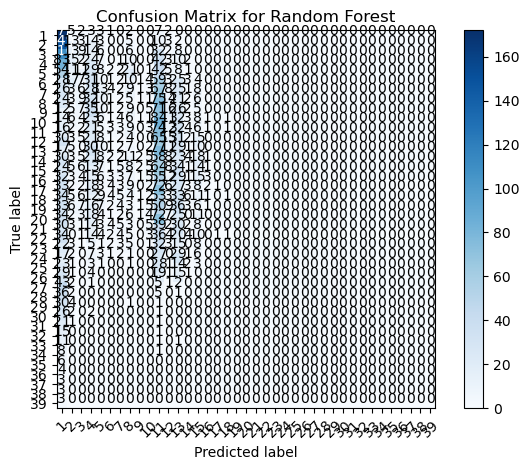

In [232]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(y_test_1950)
display(X_rf_pred_1950)

print("Confusion Matrix:")
print(confusion_matrix(y_test_1950, X_rf_pred_1950))
print()

print("Accuracy: {}".format(accuracy_score(y_test_1950, X_rf_pred_1950)))

# Compute confusion matrix
cm = confusion_matrix(y_test_1950, X_rf_pred_1950)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

In [220]:
X_test_1950

array([[2.74881517e-01, 1.57894737e-01, 5.58823529e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.60000000e+01],
       [2.14454976e-01, 0.00000000e+00, 3.52941176e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.90000000e+01],
       [7.41706161e-01, 2.39234450e-02, 4.11764706e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.30000000e+01],
       ...,
       [3.55450237e-02, 9.56937799e-03, 1.76470588e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+01],
       [1.42180095e-02, 6.69856459e-02, 2.64705882e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [1.70616114e-01, 8.13397129e-02, 7.35294118e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.70000000e+01]])

In [221]:
import numpy as np

# Angenommen, X_test_1950 ist ein numpy Array und die letzte Spalte enthält die max_drivers
# Extrahiere die max_drivers-Spalte aus X_test_1950
max_drivers = X_test_1950[:, -1]

# Konvertiere die Vorhersagen zu einem numpy Array, falls sie es nicht bereits sind
predictions = np.array(X_rf_pred_1950)

# Zähle die Vorhersagen, die größer sind als die maximale Anzahl an Fahrern
out_of_bounds_count = np.sum(predictions > max_drivers)

# Ausgabe der Anzahl der Vorhersagen außerhalb des Rasters
print(f"Anzahl der Vorhersagen außerhalb des Rasters: {out_of_bounds_count}")

Anzahl der Vorhersagen außerhalb des Rasters: 0


baseline hat RMSE von 4,9 lul

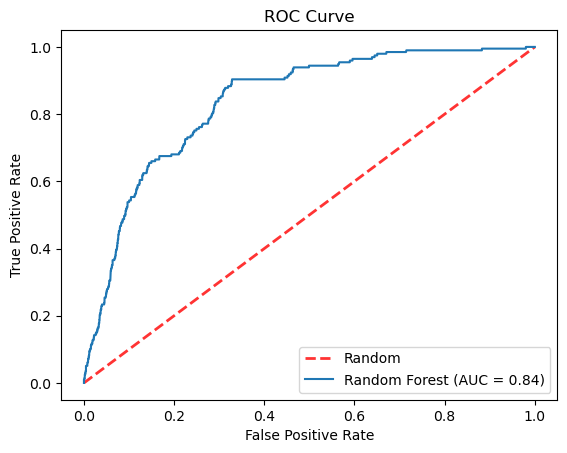

Thresholds: [       inf 0.07503178 0.07475725 ... 0.02745452 0.02732633 0.02729198]


In [861]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Klassenwahrscheinlichkeiten (Confidences) für das Test-Set
proba_for_each_class = random_forest.predict_proba(X_test_1950)

# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test_1950, proba_for_each_class[:, 1], pos_label=1)

# Berechne die AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot die Linie für zufälliges Raten
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot die ROC-Kurve für den Classifier
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Zeige den Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zeige die Schwellenwerte
print("Thresholds:", thresholds)

In [103]:
#RMSE for XG- Boost
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_xg_1950 = mean_squared_error(y_test_1950, X_pred_xg_1950)
print("Mean Squared Error:", x_mse_xg_1950)
print("Root Mean Squared Error:", sqrt(x_mse_xg_1950))

#RMSE for XGB with Successive Halving
x_mse_xg_sh_1950 = mean_squared_error(y_test_1950, X_xgb_sh_pred_1950)
print("Mean Squared Error SH:", x_mse_xg_sh_1950)
print("Root Mean Squared Error SH:", sqrt(x_mse_xg_sh_1950))

#RMSE for XG-Boost with Random Search
x_mse_xg_rs_1950= mean_squared_error(y_test_1950, X_xgb_rs_pred_1950)
print("Mean Squared Error RS:", x_mse_xg_rs_1950)
print("Root Mean Squared Error RS:", sqrt(x_mse_xg_rs_1950))
#Best


Mean Squared Error: 62.584019769357496
Root Mean Squared Error: 7.9110062425305605
Mean Squared Error SH: 61.35152388797364
Root Mean Squared Error SH: 7.832721359015246
Mean Squared Error RS: 59.02944810543657
Root Mean Squared Error RS: 7.683062417124865


## Ensembles

In [108]:
#Dauert 65 Min und 45 sek

#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier
#Pick the the two best classifiers with best found hyperparameters
estimators = {'RandomForrest with Successive Halving': rsh_rf_1950, 'XG Boost Classifier with Halving Random Search': random_search} #Possible to extend to even more classifiers

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, X_train_1950, y_train_1950, X_test_1950, y_test_1950)

RandomForrest with Successive Halving: ACC=0.10 RandomForrest with Successive Halving: RMSE=7.62
XG Boost Classifier with Halving Random Search: ACC=0.09 XG Boost Classifier with Halving Random Search: RMSE=7.68


/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Stacking: ACC=0.09 Stacking: RMSE=7.70


Keine Verbesserung --> Verscuh einer LogisticRegression oder GradientBoostingClassifier

Vielleicht Overfitten bzw Underfitten meine Modelle auch 

Hyperparameter optimization des Ensembles, 

# Model 3 - 2003 - 2024



## Load Data

In [772]:
	
X_train = pd.read_csv('../data/train/train.csv')
y_train = pd.read_csv('../data/train/train_labels.csv')

X_test = pd.read_csv('../data/test/test.csv')
y_test = pd.read_csv('../data/test/test_labels.csv')


In [773]:
# Filter X_train and X_test for entries where the year is fewer than 2018
X_train_2003 = X_train[X_train["year"] >= 2003]
X_test_2003 = X_test[X_test["year"] >= 2003]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2003 = Y_train[X_train["year"] >= 2003]
y_test_2003 = Y_test[X_test["year"] >= 2003]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2003.shape)
print("X_test_2018 shape:", X_test_2003.shape)
print("y_train_2018 shape:", y_train_2003.shape)
print("y_test_2018 shape:", y_test_2003.shape)

X_train_2018 shape: (7131, 80)
X_test_2018 shape: (1779, 80)
y_train_2018 shape: (7131, 1)
y_test_2018 shape: (1779, 1)


In [774]:
# Drop specified columns from train and test datasets
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2003 = X_train_2003.drop(columns=columns_to_drop)
X_test_2003 = X_test_2003.drop(columns=columns_to_drop)


In [775]:

#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_2003 = X_train_2003.drop(columns=X_train_2003.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_2003 = X_test_2003.drop(columns=X_test_2003.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)

In [776]:
# Drop the 'driver_nationality' column from both train and test datasets
X_train_2003 = X_train_2003.drop(columns=['driver_nationality'])
X_test_2003 = X_test_2003.drop(columns=['driver_nationality'])


### Calculate Driver Age

In [777]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2003['race_date'] = pd.to_datetime(X_train_2003['race_date'])
X_train_2003['driver_dob'] = pd.to_datetime(X_train_2003['driver_dob'])

X_train_2003['age'] = X_train_2003.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2003 = X_train_2003.drop(columns=['driver_dob'])
X_train_2003 = X_train_2003.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2003['race_date'] = pd.to_datetime(X_test_2003['race_date'])
X_test_2003['driver_dob'] = pd.to_datetime(X_test_2003['driver_dob'])

X_test_2003['age'] = X_test_2003.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2003 = X_test_2003.drop(columns=['driver_dob'])
X_test_2003 = X_test_2003.drop(columns=['race_date'])

In [778]:
def race_time_to_milliseconds(race_time_str):
    """
    Converts a Formula 1 race time string (e.g., "1:20.8888") to milliseconds.

    Parameters:
        race_time_str (str): Race time as a string in the format "M:SS.ssss".

    Returns:
        float: Race time in milliseconds.
    """
    if not isinstance(race_time_str, str):
        return np.nan
    try:
        # Split the string into minutes and seconds
        minutes, seconds = race_time_str.split(":")
        
        # Convert minutes to milliseconds
        minutes_ms = int(minutes) * 60 * 1000
        
        # Convert seconds (with fractional part) to milliseconds
        seconds_ms = float(seconds) * 1000
        
        # Total milliseconds
        total_ms = minutes_ms + seconds_ms
        
        return total_ms
    except Exception as e:
        raise ValueError(f"Invalid race time format: {race_time_str}") from e

In [779]:
def n_to_nan(x):
    if x == "\\N":
        return np.nan
    return x

In [780]:
X_train_2003 = X_train_2003.apply(lambda x: x.apply(n_to_nan))

X_test_2003 = X_test_2003.apply(lambda x: x.apply(n_to_nan))

In [781]:
def impute_times(df):
    df['q2'] = df['q2'].fillna(df['q1'])
    df['q3'] = df['q3'].fillna(df['q2'])
    return df


# Wende die Funktion auf die Trainings- und Testdaten an
X_train_2003 = impute_times(X_train_2003)
X_test_2003 = impute_times(X_test_2003)

In [782]:

X_train_2003["q1"] = X_train_2003["q1"].apply(race_time_to_milliseconds)
X_train_2003["q2"] = X_train_2003["q2"].apply(race_time_to_milliseconds)
X_train_2003["q3"] = X_train_2003["q3"].apply(race_time_to_milliseconds)

X_test_2003["q1"] = X_test_2003["q1"].apply(race_time_to_milliseconds)
X_test_2003["q2"] = X_test_2003["q2"].apply(race_time_to_milliseconds)
X_test_2003["q3"] = X_test_2003["q3"].apply(race_time_to_milliseconds)

### Creation of a maximal_driver attribute

In [783]:
# Füge die Zielvariable zu den Features hinzu
X_train_2003 = X_train_2003.join(y_train_2003)
X_test_2003 = X_test_2003.join(y_test_2003)

# Kombiniere die Trainings- und Testdaten
X_combined = pd.concat([X_train_2003, X_test_2003], keys=['train', 'test'])

# Bestimme die maximale Anzahl an Fahrern pro Jahr
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Füge das neue Attribut zu den kombinierten Daten hinzu
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Splitte die kombinierten Daten wieder in Trainings- und Testdatensätze
X_train_2003 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_2003 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Entferne die 'positionOrder'-Spalte aus den Features
X_train_2003 = X_train_2003.drop(columns=['positionOrder'])
X_test_2003 = X_test_2003.drop(columns=['positionOrder'])

# Ausgabe zur Überprüfung
print("X_train_2003:")
print(X_train_2003)
print("\nX_test_2003:")
print(X_test_2003)

X_train_2003:
      driverId  constructorId  grid  year  round  circuitId  race_lat  \
0           17              9     6  2010      1          3   26.0325   
1          813              3     8  2011      6          6   43.7347   
2            3              3    11  2007      4          4   41.5700   
3           30              6     7  2003      3         18  -23.7036   
4            1              1     3  2011     15         22   34.8431   
...        ...            ...   ...   ...    ...        ...       ...   
7126        13              6     1  2008      6          6   43.7347   
7127        13              6     3  2006     12         10   49.3278   
7128        20              9     3  2014      4         17   31.3389   
7129        33             13    18  2006      9          7   45.5000   
7130         8            208     5  2012     16         35   34.7333   

       race_lng  race_alt        q1        q2        q3  age  max_drivers  
0      50.51060         7  115298

## Encoding

In [784]:
# Encode object columns with OneHotEncoder
object_columns = X_train_2003.select_dtypes(include=['object']).columns



from sklearn import preprocessing
encoderOH = preprocessing.OneHotEncoder()
encoded_train_2003 = pd.DataFrame(encoderOH.fit_transform(X_train_2003[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
encoded_test_2003 = pd.DataFrame(encoderOH.transform(X_test_2003[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
X_train_2003 = X_train_2003.drop(columns=object_columns).join(encoded_train_2003)
X_test_2003 = X_test_2003.drop(columns=object_columns).join(encoded_test_2003)

In [785]:
display(object_columns)

Index([], dtype='object')

In [735]:
#checke ob driverId ein integer ist 
X_train_2003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7131 entries, 0 to 7130
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   driverId       7131 non-null   int64  
 1   constructorId  7131 non-null   int64  
 2   grid           7131 non-null   int64  
 3   year           7131 non-null   int64  
 4   round          7131 non-null   int64  
 5   circuitId      7131 non-null   int64  
 6   race_lat       7131 non-null   float64
 7   race_lng       7131 non-null   float64
 8   race_alt       7131 non-null   int64  
 9   q1             7023 non-null   float64
 10  q2             7023 non-null   float64
 11  q3             7023 non-null   float64
 12  age            7131 non-null   int64  
 13  max_drivers    7131 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 780.1 KB


In [736]:
# Ändere die Form der Zielvariable
y_train_2003 = y_train_2003.values.ravel()
y_test_2003 = y_test_2003.values.ravel()

In [786]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_2003)
y_train_2003 = label_encoder.fit_transform(y_train_2003)
y_test_2003 = label_encoder.transform(y_test_2003)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [672]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [430]:
import numpy as np

unique_values = np.unique(y_train_2003)
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [673]:
X_test_2003.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,age,max_drivers,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Austrian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Colombian,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Hungarian,driver_nationality_Indian,driver_nationality_Indonesian,driver_nationality_Irish,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Portuguese,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Swiss,driver_nationality_Thai,driver_nationality_Venezuelan
0,852,213,15,2023,7,4,41.5700,2.26111,109,73862.0,74477.0,74477.0,23,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,7,3,2005,16,13,50.4372,5.97139,401,106596.0,106596.0,106596.0,31,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,18,18,2005,9,19,39.7950,-86.23470,223,73632.0,73632.0,73632.0,26,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,3,14,2005,8,7,45.5000,-73.52280,13,77749.0,77749.0,77749.0,28,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39,164,24,2011,3,17,31.3389,121.22000,5,100445.0,100445.0,100445.0,34,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalisation

In [738]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Speichere die max_drivers-Spalte und entferne sie vor der Skalierung
max_drivers_train = X_train_2003['max_drivers'].values.reshape(-1, 1)
max_drivers_test = X_test_2003['max_drivers'].values.reshape(-1, 1)
X_train_2003 = X_train_2003.drop(columns=['max_drivers'])
X_test_2003 = X_test_2003.drop(columns=['max_drivers'])

# Skaliere die restlichen Features
min_max_scaler = MinMaxScaler()
X_train_2003_scaled = min_max_scaler.fit_transform(X_train_2003)
X_test_2003_scaled = min_max_scaler.transform(X_test_2003)

# Füge die max_drivers-Spalte wieder hinzu
X_train_2003 = np.hstack((X_train_2003_scaled, max_drivers_train))
X_test_2003 = np.hstack((X_test_2003_scaled, max_drivers_test))

In [435]:
X_train_2003

array([[1.86046512e-02, 3.73831776e-02, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.40000000e+01],
       [9.44186047e-01, 9.34579439e-03, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 2.40000000e+01],
       [2.32558140e-03, 9.34579439e-03, 4.58333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       ...,
       [2.20930233e-02, 3.73831776e-02, 1.25000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [3.72093023e-02, 5.60747664e-02, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.20000000e+01],
       [8.13953488e-03, 9.67289720e-01, 2.08333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.40000000e+01]])

## Learn Modell

### Random Forrest

In [436]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren
random_forest.fit(X_train_2003, y_train_2003) #Lernvorgang des Modells



RandomForestClassifier(max_depth=2, random_state=0)

In [437]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
X_rf_pred_2003 = random_forest.predict(X_test_2003)

# Zeige die Vorhersagen
print(X_rf_pred_2003)

[15  0 14 ...  0 17  4]


#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [494]:
#Dauert 2 min 24 sek

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.metrics import classification_report
#import HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)



rsh_rf_2003 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=kf,
    scoring='neg_mean_squared_error'
)

rsh_rf_2003.fit(X_train_2003, y_train_2003)

# Beste Parameter und Score

# Beste Hyperparameter und Score

print("Beste Parameter für Random Forest:", rsh_rf_2003.best_params_)
print("Bester Score für Random Forest:", sqrt(-rsh_rf_2003.best_score_))

# Vorhersagen und Bewertung
X_rf_sh_pred_2003 = rsh_rf_2003.predict(X_test_2003)
print("Classification Report für Random Forest:")
print(classification_report(y_test_2003, X_rf_sh_pred_2003, target_names=label_encoder.classes_.astype(str), zero_division=0))

#RMSE der prediction
from sklearn.metrics import mean_squared_error
x_mse_sh_2003 = mean_squared_error(y_test_2003, X_rf_sh_pred_2003)
print("Mean Squared Error:", x_mse_sh_2003)
print("Root Mean Squared Error:", sqrt(x_mse_sh_2003))

Beste Parameter für Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.75, 'max_depth': 10}
Bester Score für Random Forest: 5.495312385215591
Classification Report für Random Forest:
              precision    recall  f1-score   support

           1       0.48      0.59      0.53        79
           2       0.23      0.24      0.24        87
           3       0.19      0.25      0.21        81
           4       0.16      0.22      0.19        86
           5       0.06      0.07      0.07        82
           6       0.15      0.12      0.13        83
           7       0.08      0.10      0.09        79
           8       0.08      0.09      0.08        92
           9       0.06      0.07      0.07        83
          10       0.05      0.04      0.04        81
          11       0.09      0.11      0.10        93
          12       0.14      0.15      0.15        79
          13       0.06      0.08      0.07        85
         

PLätze 36,37 und 39 wird nicht vorhergesagt. Deswegen gibt es dafür keine precision oder recall werte --> ANpassung durch parameter zero_division bei division report

#### Hyperparameter Tuning via Grid Search

In [560]:
# Dauert 2 min 40 sek
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt


# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Führe K-Fold Cross-Validation auf dem Trainings-Set durch und berechne die Scores
scores = cross_val_score(random_forest, X_train_2003, y_train_2003, cv=skf, scoring='neg_mean_squared_error')

# Berechne den durchschnittlichen MSE und RMSE auf dem Trainings-Set
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) auf dem Trainings-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) auf dem Trainings-Set:", mean_rmse)

# Hyperparameter-Tuning mit GridSearchCV und K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_2003, y_train_2003)

# Beste Hyperparameter und Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Beste Hyperparameter:", best_params)
print("Bester RMSE auf dem Trainings-Set:", sqrt(best_score))

# Trainiere das Modell mit den besten Hyperparametern auf dem gesamten Trainings-Set
best_model = grid_search.best_estimator_
best_model.fit(X_train_2003, y_train_2003)

# Mache Vorhersagen auf dem Test-Set
X_rf_gs_pred_2003 = best_model.predict(X_test_2003)

# Berechne den MSE und RMSE auf dem Test-Set
gs_mse = mean_squared_error(y_test_2003, X_rf_gs_pred_2003)
gs_rmse = sqrt(gs_mse)

print("Mean Squared Error (MSE) auf dem Test-Set:", gs_mse)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", gs_rmse)

Mean Squared Error (MSE) auf dem Trainings-Set: 39.73210061221622
Root Mean Squared Error (RMSE) auf dem Trainings-Set: 6.303340432835293
Beste Hyperparameter: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Bester RMSE auf dem Trainings-Set: 5.639563815475193
Mean Squared Error (MSE) auf dem Test-Set: 30.58516020236088
Root Mean Squared Error (RMSE) auf dem Test-Set: 5.530385176672677


### XG Boost

In [481]:
# XGBoost trainieren
import xgboost as xgb

clf_xg_2003 = xgb.XGBClassifier(random_state=42)
clf_xg_2003.fit(X_train_2003, y_train_2003)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [482]:
#predicten des obigen classifiers
X_pred_xg_2003 = clf_xg_2003.predict(X_test_2003)
print(X_pred_xg_2003)

[ 9  8 18 ...  0 16 10]


In [794]:
X_train_2003.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,age,max_drivers
0,17,9,6,2010,1,3,26.0325,50.51060,7,115298.0,114318.0,115284.0,33,24
1,813,3,8,2011,6,6,43.7347,7.42056,7,75819.0,75545.0,76528.0,26,24
2,3,3,11,2007,4,4,41.5700,2.26111,109,81943.0,81968.0,81968.0,21,22
3,30,6,7,2003,3,18,-23.7036,-46.69970,785,74130.0,74130.0,74130.0,34,20
4,1,1,3,2011,15,22,34.8431,136.54100,45,92843.0,91139.0,90617.0,26,24


#### Randomized Search for XGB

In [796]:
# dauert 8 min 30
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisiere den XGBoost Classifier
xgb_2003 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2,4,5, 8, 10],
    'learning_rate': [ 0.01, 0.05, 0.1],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV mit K-Fold Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_2003, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search.fit(X_train_2003, y_train_2003)

# Beste Parameter und Score
print("Beste Parameter:", random_search.best_params_)
print("Bester Score:", sqrt(-random_search.best_score_))

# Beim Classification Report kann noch noch der Parameter zero_division hinzugefügt werden um das Verhalten bei undefinierten Präzisions- und Recall Werten zu steuern
# Vorhersagen und Bewertung
X_xgb_rs_pred_2003 = random_search.predict(X_test_2003)
X_xgb_rs_pred_2003_original = label_encoder.inverse_transform(X_xgb_rs_pred_2003)
print("Classification Report:")
print(classification_report(y_test_2003, X_xgb_rs_pred_2003_original))

# Berechne den RMSE auf dem Test-Set
test_mse_2003 = mean_squared_error(y_test_2003, X_xgb_rs_pred_2003)
test_rmse_2003 = sqrt(test_mse_2003)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", test_rmse_2003)

Beste Parameter: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Bester Score: 5.576509584008483
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.23      0.33      0.27        87
           2       0.23      0.26      0.25        81
           3       0.19      0.21      0.20        86
           4       0.17      0.26      0.21        82
           5       0.13      0.18      0.15        83
           6       0.18      0.18      0.18        79
           7       0.09      0.13      0.11        92
           8       0.15      0.13      0.14        83
           9       0.13      0.10      0.11        81
          10       0.11      0.09      0.10        93
          11       0.08      0.06      0.07        79
          12       0.07      0.06      0.06        85
          13       0.08      0.08      0.08        89
          14 

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [741]:
import pickle

with open("random_search2003.pkl",'wb') as file: 
    pickle.dump(random_search, file)



### Gradient Boost

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Modell trainieren
pipeline.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_gb_1950 = pipeline.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_gb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.31      0.49      0.38       197
           2       0.14      0.24      0.18       202
           3       0.11      0.17      0.13       200
           4       0.07      0.12      0.09       199
           5       0.09      0.17      0.12       195
           6       0.06      0.09      0.07       205
           7       0.08      0.05      0.06       204
           8       0.06      0.06      0.06       206
           9       0.06      0.04      0.05       206
          10       0.06      0.10      0.08       206
          11       0.05      0.09      0.06       194
          12       0.07      0.07      0.07       202
          13       0.06      0.06      0.06       202
          14       0.02      0.01      0.01       201
          15       0.03      0.03      0.03       198
          16       0.07      0.03      0.04       194
          17       0.07      0.03      0.04       195
          18       0.08    

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_gb_1950 = mean_squared_error(y_test_1950, X_pred_gb_1950)
print("Mean Squared Error GB 1950:", x_mse_gb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error GB 1950:", sqrt(x_mse_gb_1950))

Mean Squared Error GB 1950: 63.911037891268535
Root Mean Squared Error GB 1950: 7.994437934668611


### Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc1950 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc1950.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_hgb_1950 = hgbc1950.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_hgb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.28      0.49      0.36       197
           2       0.18      0.36      0.24       202
           3       0.08      0.09      0.08       200
           4       0.07      0.23      0.11       199
           5       0.08      0.13      0.10       195
           6       0.08      0.12      0.10       205
           7       0.04      0.00      0.01       204
           8       0.05      0.03      0.04       206
           9       0.09      0.01      0.02       206
          10       0.06      0.06      0.06       206
          11       0.06      0.12      0.08       194
          12       0.08      0.08      0.08       202
          13       0.04      0.06      0.05       202
          14       0.04      0.02      0.03       201
          15       0.04      0.06      0.05       198
          16       0.07      0.05      0.05       194
          17       0.06      0.04      0.05       195
          18       0.09    

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_hgb_1950 = mean_squared_error(y_test_1950, X_pred_hgb_1950)
print("Mean Squared Error HGB 1950:", x_mse_hgb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error HGB 1950:", sqrt(x_mse_hgb_1950))

Mean Squared Error HGB 1950: 71.72817133443164
Root Mean Squared Error HGB 1950: 8.469248569644867


## Evaluation

### Standard Random forrest

In [489]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_2003 = mean_squared_error(y_test_2003, X_rf_pred_2003)
print("Mean Squared Error:", x_mse_2003)
from math import sqrt
print("Root Mean Squared Error Normal:", sqrt(x_mse_2003))

x_mse_sh_2003 = mean_squared_error(y_test_2003, X_rf_sh_pred_2003)
print("Root Mean Squared Error SH:", sqrt(x_mse_sh_2003))

x_mse_rs_2003 = mean_squared_error(y_test_2003, X_xgb_rs_pred_2003)
print("Root Mean Squared Error RS:", sqrt(x_mse_rs_2003))




Mean Squared Error: 40.12928611579539
Root Mean Squared Error Normal: 6.334768039620345
Root Mean Squared Error SH: 5.649446440272397
Root Mean Squared Error RS: 5.7489153851554775


array([11, 15,  4, ...,  0, 17,  7])

array([18,  1, 17, ...,  0, 16,  5])

Confusion Matrix:
[[45 18  8  3  2  0  0  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [20 17 23 12  4  3  2  1  1  0  1  2  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 9 17 18 14  6  4  5  2  3  0  0  1  0  0  1  0  0  0  0  1  0  0  0  0]
 [ 0 11 12 18 19  7  4  4  0  1  2  1  0  4  0  1  1  1  0  0  0  0  0  0]
 [ 1  5 11 13 10  5 10  3  4  3  3  3  2  3  1  1  1  1  1  1  0  0  0  0]
 [ 0  2  7  7 11 10 11  8  5  7  1  1  2  4  0  0  1  2  3  1  0  0  0  0]
 [ 0  3  5  6  7 13  7  6  9  2  4  2  6  3  0  3  2  0  0  1  0  0  0  0]
 [ 4  3  1  3  8  9  9  5  6  6  6  3  4  4  4  2  5  3  6  1  0  0  0  0]
 [ 0  0  2  2  8  5 11 10  4  8  6  4  5  6  4  1  5  0  0  1  1  0  0  0]
 [ 1  0  1  5  9  3  2  4  9  1  7 11  5  3  3  4  3  2  6  1  0  1  0  0]
 [ 1  1  1  2  4  1 10  5  7  8  8  6  9 14  3  4  2  4  3  0  0  0  0  0]
 [ 1  1  1  1  2  2  2  6  2  5  8  9  8  9  8  4  3  4  3  0  0  0  0  0]
 [ 0  1  1  1  3  2  8  3  4  5  9  7  6  8  7  3  7  5  5  0  0  0  0  0]
 [ 3  1

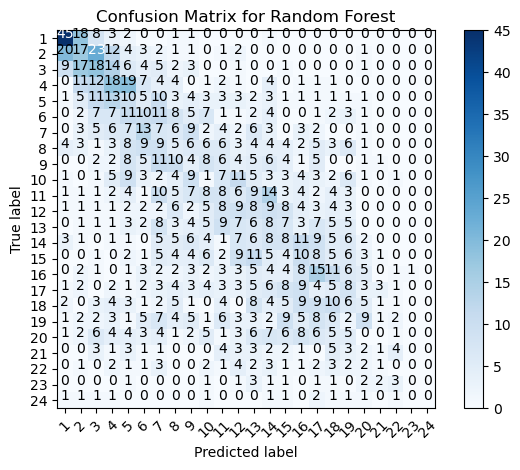

In [491]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(y_test_2003)
display(X_rf_sh_pred_2003)

print("Confusion Matrix:")
print(confusion_matrix(y_test_2003, X_rf_sh_pred_2003))
print()

print("Accuracy: {}".format(accuracy_score(y_test_2003, X_rf_sh_pred_2003)))

# Compute confusion matrix
cm = confusion_matrix(y_test_2003, X_rf_sh_pred_2003)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

In [487]:
import numpy as np

# Angenommen, X_test_1950 ist ein numpy Array und die letzte Spalte enthält die max_drivers
# Extrahiere die max_drivers-Spalte aus X_test_1950
max_drivers = X_test_2003[:, -1]

# Konvertiere die Vorhersagen zu einem numpy Array, falls sie es nicht bereits sind
predictions = np.array(X_rf_pred_2003)

# Zähle die Vorhersagen, die größer sind als die maximale Anzahl an Fahrern
out_of_bounds_count = np.sum(predictions > max_drivers)

# Ausgabe der Anzahl der Vorhersagen außerhalb des Rasters
print(f"Anzahl der Vorhersagen außerhalb des Rasters: {out_of_bounds_count}")

Anzahl der Vorhersagen außerhalb des Rasters: 0


baseline hat RMSE von 4,9 lul

In [486]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Klassenwahrscheinlichkeiten (Confidences) für das Test-Set
proba_for_each_class = random_forest.predict_proba(X_test_2003)

# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test_2003, proba_for_each_class[:, 1], pos_label=1)

# Berechne die AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot die Linie für zufälliges Raten
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot die ROC-Kurve für den Classifier
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Zeige den Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zeige die Schwellenwerte
print("Thresholds:", thresholds)

ValueError: X has 46 features, but RandomForestClassifier is expecting 62 features as input.

### XGB

In [492]:
#RMSE for XG- Boost
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_xg_2003 = mean_squared_error(y_test_2003, X_pred_xg_2003)
print("Mean Squared Error:", x_mse_xg_2003)
print("Root Mean Squared Error:", sqrt(x_mse_xg_2003))


#RMSE for XG-Boost with Random Search
x_mse_xg_rs_2003= mean_squared_error(y_test_2003, X_xgb_rs_pred_2003)
print("Mean Squared Error RS:", x_mse_xg_rs_2003)
print("Root Mean Squared Error RS:", sqrt(x_mse_xg_rs_2003))
#Best


Mean Squared Error: 35.87352445193929
Root Mean Squared Error: 5.989451097716659
Mean Squared Error RS: 33.05002810567735
Root Mean Squared Error RS: 5.7489153851554775


## Ensembles

In [ ]:
#Dauert 65 Min und 45 sek

#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier
#Pick the the two best classifiers with best found hyperparameters
estimators = {'RandomForrest with Successive Halving': rsh_rf_1950, 'XG Boost Classifier with Halving Random Search': random_search} #Possible to extend to even more classifiers

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, X_train_1950, y_train_1950, X_test_1950, y_test_1950)

RandomForrest with Successive Halving: ACC=0.10 RandomForrest with Successive Halving: RMSE=7.62
XG Boost Classifier with Halving Random Search: ACC=0.09 XG Boost Classifier with Halving Random Search: RMSE=7.68


/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Stacking: ACC=0.09 Stacking: RMSE=7.70


Keine Verbesserung --> Verscuh einer LogisticRegression oder GradientBoostingClassifier

Vielleicht Overfitten bzw Underfitten meine Modelle auch 

Hyperparameter optimization des Ensembles, 

# Model 4 2011-2024

## Load Data

In [799]:
	
X_train = pd.read_csv('../data/train/train.csv')
y_train = pd.read_csv('../data/train/train_labels.csv')

X_test = pd.read_csv('../data/test/test.csv')
y_test = pd.read_csv('../data/test/test_labels.csv')


In [800]:
# Filter X_train and X_test for entries where the year is fewer than 2018
X_train_2011 = X_train[X_train["year"] >= 2011]
X_test_2011 = X_test[X_test["year"] >= 2011]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2011 = Y_train[X_train["year"] >= 2011]
y_test_2011 = Y_test[X_test["year"] >= 2011]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2011.shape)
print("X_test_2018 shape:", X_test_2011.shape)
print("y_train_2018 shape:", y_train_2011.shape)
print("y_test_2018 shape:", y_test_2011.shape)

X_train_2018 shape: (4743, 80)
X_test_2018 shape: (1177, 80)
y_train_2018 shape: (4743, 1)
y_test_2018 shape: (1177, 1)


In [801]:
# Drop specified columns from train and test datasets
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2011 = X_train_2011.drop(columns=columns_to_drop)
X_test_2011 = X_test_2011.drop(columns=columns_to_drop)


In [802]:
#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_2011 = X_train_2011.drop(columns=X_train_2011.loc[:, 'q_position':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_2011 = X_test_2011.drop(columns=X_test_2011.loc[:, 'q_position':'fp3_avg_is_on_fresh_tyres'].columns)

In [803]:
# Drop the 'driver_nationality' column from both train and test datasets
X_train_2011 = X_train_2011.drop(columns=['driver_nationality'])
X_test_2011 = X_test_2011.drop(columns=['driver_nationality'])


### Calculate Driver Age

In [804]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2011['race_date'] = pd.to_datetime(X_train_2011['race_date'])
X_train_2011['driver_dob'] = pd.to_datetime(X_train_2011['driver_dob'])

X_train_2011['age'] = X_train_2011.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2011 = X_train_2011.drop(columns=['driver_dob'])
X_train_2011 = X_train_2011.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2011['race_date'] = pd.to_datetime(X_test_2011['race_date'])
X_test_2011['driver_dob'] = pd.to_datetime(X_test_2011['driver_dob'])

X_test_2011['age'] = X_test_2011.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2011 = X_test_2011.drop(columns=['driver_dob'])
X_test_2011 = X_test_2011.drop(columns=['race_date'])

In [805]:
def race_time_to_milliseconds(race_time_str):
    """
    Converts a Formula 1 race time string (e.g., "1:20.8888") to milliseconds.

    Parameters:
        race_time_str (str): Race time as a string in the format "M:SS.ssss".

    Returns:
        float: Race time in milliseconds.
    """
    if not isinstance(race_time_str, str):
        return np.nan
    try:
        # Split the string into minutes and seconds
        minutes, seconds = race_time_str.split(":")
        
        # Convert minutes to milliseconds
        minutes_ms = int(minutes) * 60 * 1000
        
        # Convert seconds (with fractional part) to milliseconds
        seconds_ms = float(seconds) * 1000
        
        # Total milliseconds
        total_ms = minutes_ms + seconds_ms
        
        return total_ms
    except Exception as e:
        raise ValueError(f"Invalid race time format: {race_time_str}") from e

In [806]:
def n_to_nan(x):
    if x == "\\N":
        return np.nan
    return x

In [807]:
X_train_2011 = X_train_2011.apply(lambda x: x.apply(n_to_nan))

X_test_2011 = X_test_2011.apply(lambda x: x.apply(n_to_nan))

In [808]:
def impute_times(df):
    df['q2'] = df['q2'].fillna(df['q1'])
    df['q3'] = df['q3'].fillna(df['q2'])
    return df


# Wende die Funktion auf die Trainings- und Testdaten an
X_train_2011 = impute_times(X_train_2011)
X_test_2011 = impute_times(X_test_2011)

In [809]:
X_train_2011 = impute_times(X_train_2011)
X_test_2011 = impute_times(X_test_2011)

X_train_2011 = X_train_2011.apply(lambda x: x.apply(n_to_nan))
X_test_2011 = X_test_2011.apply(lambda x: x.apply(n_to_nan))

X_train_2011["q1"] = X_train_2011["q1"].apply(race_time_to_milliseconds)
X_train_2011["q2"] = X_train_2011["q2"].apply(race_time_to_milliseconds)
X_train_2011["q3"] = X_train_2011["q3"].apply(race_time_to_milliseconds)

X_test_2011["q1"] = X_test_2011["q1"].apply(race_time_to_milliseconds)
X_test_2011["q2"] = X_test_2011["q2"].apply(race_time_to_milliseconds)
X_test_2011["q3"] = X_test_2011["q3"].apply(race_time_to_milliseconds)

### Creation of a maximal_driver attribute

In [810]:
# Füge die Zielvariable zu den Features hinzu
X_train_2011 = X_train_2011.join(y_train_2011)
X_test_2011 = X_test_2011.join(y_test_2011)

# Kombiniere die Trainings- und Testdaten
X_combined = pd.concat([X_train_2011, X_test_2011], keys=['train', 'test'])

# Bestimme die maximale Anzahl an Fahrern pro Jahr
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Füge das neue Attribut zu den kombinierten Daten hinzu
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Splitte die kombinierten Daten wieder in Trainings- und Testdatensätze
X_train_2011 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_2011 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Entferne die 'positionOrder'-Spalte aus den Features
X_train_2011 = X_train_2011.drop(columns=['positionOrder'])
X_test_2011 = X_test_2011.drop(columns=['positionOrder'])

# Ausgabe zur Überprüfung
print("X_train_2011:")
print(X_train_2011)
print("\nX_test_2011:")
print(X_test_2011)

X_train_2011:
      driverId  constructorId  grid  year  round  circuitId  race_lat  \
0          813              3     8  2011      6          6  43.73470   
1            1              1     3  2011     15         22  34.84310   
2           13              3    10  2016     16          2   2.76083   
3            8              6     5  2015     10         11  47.57890   
4          842              5    17  2017     20         24  24.46720   
...        ...            ...   ...   ...    ...        ...       ...   
4738         8              6    11  2016      6          6  43.73470   
4739       817              1     4  2021     12         13  50.43720   
4740       818              5    10  2013      6          6  43.73470   
4741        20              9     3  2014      4         17  31.33890   
4742         8            208     5  2012     16         35  34.73330   

       race_lng  race_alt        q1        q2        q3  \
0       7.42056         7   75819.0   75545.0   76

## Encoding

In [811]:
# Encode object columns with OneHotEncoder
object_columns = X_train_2011.select_dtypes(include=['object']).columns



from sklearn import preprocessing
encoderOH = preprocessing.OneHotEncoder()
encoded_train_2011 = pd.DataFrame(encoderOH.fit_transform(X_train_2011[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
encoded_test_2011 = pd.DataFrame(encoderOH.transform(X_test_2011[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
X_train_2011 = X_train_2011.drop(columns=object_columns).join(encoded_train_2011)
X_test_2011 = X_test_2011.drop(columns=object_columns).join(encoded_test_2011)

In [812]:
# Ändere die Form der Zielvariable
y_train_2011 = y_train_2011.values.ravel()
y_test_2011 = y_test_2011.values.ravel()

In [813]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_2011)
y_train_2011 = label_encoder.fit_transform(y_train_2011)
y_test_2011 = label_encoder.transform(y_test_2011)

In [814]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [512]:
import numpy as np

unique_values = np.unique(y_train_2011)
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [465]:
X_test_2011.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,age,max_drivers,driver_nationality_American,driver_nationality_Argentinian,driver_nationality_Australian,driver_nationality_Belgian,driver_nationality_Brazilian,driver_nationality_British,driver_nationality_Canadian,driver_nationality_Chinese,driver_nationality_Danish,driver_nationality_Dutch,driver_nationality_Finnish,driver_nationality_French,driver_nationality_German,driver_nationality_Indian,driver_nationality_Indonesian,driver_nationality_Italian,driver_nationality_Japanese,driver_nationality_Mexican,driver_nationality_Monegasque,driver_nationality_New Zealander,driver_nationality_Polish,driver_nationality_Russian,driver_nationality_Spanish,driver_nationality_Swedish,driver_nationality_Swiss,driver_nationality_Thai,driver_nationality_Venezuelan
0,852,213,15,2023,7,4,41.5700,2.26111,109,73862.0,74477.0,74477.0,22009.0,22176.0,22092.5,118.086832,2.0,2.0,10.0,34.0,22.0,16.970563,240218.586397,185744.145248,22457.888282,185098.548387,23458.6,23458.6,22641.1,475732.8,73862.0,74477.0,NaN,23,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39,164,24,2011,3,17,31.3389,121.22000,5,100445.0,100445.0,100445.0,26049.0,26049.0,26049.0,0.000000,1.0,1.0,23.0,23.0,23.0,0.000000,25987.694444,26240.348214,22418.827586,23432.719665,25087.4,25087.4,22446.4,27483.8,NaN,NaN,NaN,34,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,839,214,8,2022,3,1,-37.8497,144.96800,10,79605.0,79136.0,79061.0,19128.0,19128.0,19128.0,0.000000,1.0,1.0,17.0,17.0,17.0,0.000000,108606.732673,196003.936709,158972.493976,138531.578035,24861.0,238419.0,25853.6,21490.4,79605.0,79136.0,79061.0,25,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,825,210,7,2019,1,1,-37.8497,144.96800,10,82519.0,82221.0,82099.0,22388.0,22388.0,22388.0,0.000000,1.0,1.0,14.0,14.0,14.0,0.000000,84406.684783,99182.802013,133221.017986,24962.793814,25373.0,25253.6,208781.0,23992.8,82519.0,82221.0,82099.0,26,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,844,6,5,2021,14,14,45.6156,9.28111,162,81219.0,80767.0,80510.0,24557.0,24557.0,24557.0,0.000000,1.0,1.0,26.0,26.0,26.0,0.000000,140738.132530,80525.846318,89103.569277,221254.427495,23519.4,23519.4,24280.2,428743.0,NaN,NaN,NaN,23,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalisation

In [720]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Speichere die max_drivers-Spalte und entferne sie vor der Skalierung
max_drivers_train = X_train_2011['max_drivers'].values.reshape(-1, 1)
max_drivers_test = X_test_2011['max_drivers'].values.reshape(-1, 1)
X_train_2011 = X_train_2011.drop(columns=['max_drivers'])
X_test_2011 = X_test_2011.drop(columns=['max_drivers'])

# Skaliere die restlichen Features
min_max_scaler = MinMaxScaler()
X_train_2011_scaled = min_max_scaler.fit_transform(X_train_2011)
X_test_2011_scaled = min_max_scaler.transform(X_test_2011)

# Füge die max_drivers-Spalte wieder hinzu
X_train_2011 = np.hstack((X_train_2011_scaled, max_drivers_train))
X_test_2011 = np.hstack((X_test_2011_scaled, max_drivers_test))

## Learn Modell

### Random Forrest

In [514]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren
random_forest.fit(X_train_2011, y_train_2011) #Lernvorgang des Modells



RandomForestClassifier(max_depth=2, random_state=0)

In [515]:
# Vorhersagen mit dem RandomForestClassifier auf df1_test_preprocessed
X_rf_pred_2011 = random_forest.predict(X_test_2011)

# Zeige die Vorhersagen
print(X_rf_pred_2011)

[12 12 12 ...  0 11 12]


#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [517]:
#Dauert 5 min 45 sek

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.metrics import classification_report
#import HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)



rsh_rf_2011 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=kf,
    scoring='neg_mean_squared_error'
)

rsh_rf_2011.fit(X_train_2011, y_train_2011)

# Beste Parameter und Score
print("Beste Parameter für Random Forest:", rsh_rf_2011.best_params_)
print("Bester Score für Random Forest:", sqrt(-rsh_rf_2011.best_score_))

# Vorhersagen und Bewertung
X_rf_sh_pred_2011 = rsh_rf_2011.predict(X_test_2011)
print("Classification Report für Random Forest:")
print(classification_report(y_test_2011, X_rf_sh_pred_2011, target_names=label_encoder.classes_.astype(str), zero_division=0))

#RMSE der prediction
from sklearn.metrics import mean_squared_error
x_mse_sh_2011 = mean_squared_error(y_test_2011, X_rf_sh_pred_2011)
print("Mean Squared Error:", x_mse_sh_2011)
print("Root Mean Squared Error:", sqrt(x_mse_sh_2011))

Beste Parameter für Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30}
Bester Score für Random Forest: 4.518315856975752
Classification Report für Random Forest:
              precision    recall  f1-score   support

           1       0.52      0.63      0.57        54
           2       0.20      0.15      0.17        60
           3       0.16      0.24      0.19        55
           4       0.17      0.17      0.17        58
           5       0.11      0.12      0.12        56
           6       0.11      0.10      0.11        60
           7       0.05      0.05      0.05        55
           8       0.06      0.07      0.06        54
           9       0.04      0.04      0.04        53
          10       0.08      0.08      0.08        51
          11       0.11      0.08      0.09        63
          12       0.10      0.11      0.10        54
          13       0.05      0.06      0.05        53
          

PLätze 36,37 und 39 wird nicht vorhergesagt. Deswegen gibt es dafür keine precision oder recall werte --> ANpassung durch parameter zero_division bei division report

#### Hyperparameter Tuning via Grid Search

In [518]:
#dauert 6 min 9 sek
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Führe K-Fold Cross-Validation auf dem Trainings-Set durch und berechne die Scores
scores = cross_val_score(random_forest, X_train_2011, y_train_2011, cv=skf, scoring='neg_mean_squared_error')

# Berechne den durchschnittlichen MSE und RMSE auf dem Trainings-Set
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) auf dem Trainings-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) auf dem Trainings-Set:", mean_rmse)

# Hyperparameter-Tuning mit GridSearchCV und K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_2011, y_train_2011)

# Beste Hyperparameter und Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Beste Hyperparameter:", best_params)
print("Bester MSE auf dem Trainings-Set:", sqrt(best_score))

# Trainiere das Modell mit den besten Hyperparametern auf dem gesamten Trainings-Set
best_model = grid_search.best_estimator_
best_model.fit(X_train_2011, y_train_2011)

# Mache Vorhersagen auf dem Test-Set
X_rf_gs_pred_2011 = best_model.predict(X_test_2011)

# Berechne den MSE und RMSE auf dem Test-Set
gs_mse = mean_squared_error(y_test_2011, X_rf_gs_pred_2011)
gs_rmse = sqrt(gs_mse)

print("Mean Squared Error (MSE) auf dem Test-Set:", gs_mse)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", gs_rmse)

Mean Squared Error (MSE) auf dem Trainings-Set: 27.714740143966782
Root Mean Squared Error (RMSE) auf dem Trainings-Set: 5.264479095216048
Beste Hyperparameter: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Bester MSE auf dem Trainings-Set: 4.539226438340589
Mean Squared Error (MSE) auf dem Test-Set: 18.477485131690738
Root Mean Squared Error (RMSE) auf dem Test-Set: 4.298544536432156


### XG Boost

In [ ]:
# XGBoost trainieren
import xgboost as xgb

clf_xg_2011 = xgb.XGBClassifier(random_state=42)
clf_xg_2011.fit(X_train_2011, y_train_2011)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#predicten des obigen classifiers
X_pred_xg_2011 = clf_xg_1950.predict(X_test_2011)
print(X_pred_xg_2011)

[13  1  3 ...  4 18  7]


#### Successive Halving für XGB


Geht vermutlich nicht, da beim StratKFold klassen herrausgelöscht wurden, die dann nciht merh vorhanden waren.

Möglichkeiten:
1) Tuning via RandomizedSearch oder einer anderen Methode wo keine Kandidaten eliminiert werden (siehe unten)
2) Erhöhe Anzahl der Folds bei StratifiedKFold --> bei erhöhung auf 15+ oversampling funktioniert es
3) Benutze RepeatedStratifiedKFold um Anzahl an Wiederholungen zu erhöhen
4) Verwende Techniken wie Oversampling oder Undersampling  --> BorderlineSmote aber hat Probleme mit NaN Werten in X_train_1950
5) Lasse Cross validation Weg

In [ ]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [ ]:
# Überprüfe die Klassenlabels in den Trainings- und Testdaten
print("Einzigartige Klassen in y_train:", np.unique(y_train_2011))
print("Einzigartige Klassen in y_test:", np.unique(y_test_2011))


Einzigartige Klassen in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Einzigartige Klassen in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
# Fitte den LabelEncoder auf die kombinierten Trainings- und Testdaten
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_combined = np.concatenate((y_train_2011, y_test_2011))
label_encoder.fit(y_combined)

# Transformiere die Trainings- und Testdaten
y_train_2011 = label_encoder.transform(y_train_2011)
y_test_2011 = label_encoder.transform(y_test_2011)

In [ ]:
#ZEIGE MIR ALLE UNIQUEN VALUESD VON Y_TRAIN_1950
unique_values_y_train_2011 = np.unique(y_train_2011)
print(unique_values_y_train_2011)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [ ]:
# Berechne die Anzahl der Stichproben für jede Klasse
unique_classes, class_counts = np.unique(y_train_2011, return_counts=True)

# Sortiere die Klassen nach Häufigkeit und wähle die 10 seltensten Klassen aus
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

# Filtere die Klassen, die tatsächlich in den Trainingsdaten vorhanden sind
present_classes = [cls for cls in sorted_classes if cls in unique_classes]

# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)

#### Try mit Oversampling und StartifiedKfold auf 15 setzen 

In [ ]:
#Dauert so xx
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

# Successive Halving Hyperparameter Tuning for XGBoost

clf_xg_sh_2011 = xgb.XGBClassifier(random_state=42)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
}

#------------------------------------------
# TEST: OVERSAMPLING
# Definiere Oversampling und Undersampling
imputer = SimpleImputer(strategy='mean')

# Berechne die Anzahl der Stichproben für jede Klasse
unique_classes, class_counts = np.unique(y_train_2011, return_counts=True)

# Sortiere die Klassen nach Häufigkeit und wähle die 10 seltensten Klassen aus
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

# Filtere die Klassen, die tatsächlich in den Trainingsdaten vorhanden sind
present_classes = [cls for cls in sorted_classes if cls in y_train_2011]

# Definiere das Sampling-Strategie-Dictionary nur für die 10 seltensten Klassen, die vorhanden sind
max_class_count = max(class_counts)
sampling_strategy = {cls: int(max_class_count * 0.1) for cls in present_classes}

# Überprüfe, ob die Klassen tatsächlich in den Trainingsdaten vorhanden sind
valid_classes = [cls for cls in sampling_strategy.keys() if cls in y_train_2011]
sampling_strategy = {cls: sampling_strategy[cls] for cls in valid_classes}

# Überprüfe, ob das Sampling-Strategie-Dictionary leer ist
if not sampling_strategy:
    raise ValueError("Keine gültigen Klassen zum Oversampling gefunden.")

over = BorderlineSMOTE(sampling_strategy=sampling_strategy)

# Erstelle eine Pipeline
steps = [('imputer', imputer), ('o', over), ('model', clf_xg_sh_2011)]
pipeline = Pipeline(steps=steps)
#------------------------------------------
skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb_2011 = HalvingRandomSearchCV(
    estimator=pipeline, param_distributions=param_dist_xgb, factor=2, random_state=42, cv=skf
)

rsh_xgb_2011.fit(X_train_2011, y_train_2011)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb_20110.best_params_)
print("Bester Score für XGBoost:", rsh_xgb_2011.best_score_)

# Vorhersagen und Bewertung
X_xgb_sh_pred_2011 = rsh_xgb_2011.predict(X_test_2011)
print("Classification Report für XGBoost:")
print(classification_report(y_test_2011, X_xgb_sh_pred_2011, target_names=label_encoder.classes_.astype(str), zero_division=0))

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  warnings.warn(
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
224 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/s

KeyboardInterrupt: 

#### Try mit RepeatedStratifiedKFold

In [ ]:
#Dauert so 16 min
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold

# Successive Halving Hyperparameter Tuning for XGBoost

clf_xg_sh_2011 = xgb.XGBClassifier(random_state=42)

# Definiere den Parameter-Raster
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Führe die Halving Random Search durch
rsh_xgb_2011 = HalvingRandomSearchCV(
    estimator=clf_xg_sh_2011, param_distributions=param_dist_xgb, factor=2, random_state=42, cv=rskf
)

rsh_xgb_2011.fit(X_train_2011, y_train_2011)

# Beste Parameter und Score
print("Beste Parameter für XGBoost:", rsh_xgb_2011.best_params_)
print("Bester Score für XGBoost:", rsh_xgb_2011.best_score_)

# Vorhersagen und Bewertung
X_xgb_sh_pred_2011 = rsh_xgb_2011.predict(X_test_2011)
print("Classification Report für XGBoost:")
print(classification_report(y_test_2011, X_xgb_sh_pred_2011, target_names=label_encoder.classes_.astype(str), zero_division=0))

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
176 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid 

Beste Parameter für XGBoost: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Bester Score für XGBoost: 0.1060598682593072
Classification Report für XGBoost:
              precision    recall  f1-score   support

           0       0.30      0.56      0.39       197
           1       0.18      0.37      0.25       202
           2       0.09      0.17      0.11       200
           3       0.07      0.20      0.10       199
           4       0.08      0.12      0.10       195
           5       0.09      0.11      0.10       205
           6       0.09      0.02      0.04       204
           7       0.06      0.05      0.06       206
           8       0.11      0.00      0.01       206
           9       0.06      0.08      0.07       206
          10       0.06      0.12      0.08       194
          11       0.08      0.13      0.10       202
          12       0.07      0.08      0.07       202
          13       0.05      0

#### Randomized Search for XGB

In [742]:
# dauert 4 min 50 sek
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisiere den XGBoost Classifier
xgb_2011 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [30,50, 80],
    'max_depth': [6, 8, 10],
    'learning_rate': [ 0.02,0.05, 0.1],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Definiere K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV mit K-Fold Cross-Validation
random_search2011 = RandomizedSearchCV(
    estimator=xgb_2011, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search2011.fit(X_train_2011, y_train_2011)

# Beste Parameter und Score
print("Beste Parameter:", random_search2011.best_params_)
print("Bester Score:", sqrt(-random_search2011.best_score_))

# Beim Classification Report kann noch noch der Parameter zero_division hinzugefügt werden um das Verhalten bei undefinierten Präzisions- und Recall Werten zu steuern
# Vorhersagen und Bewertung
X_xgb_rs_pred_2011 = random_search2011.predict(X_test_2011)
X_xgb_rs_pred_2011_original = label_encoder.inverse_transform(X_xgb_rs_pred_2011)
print("Classification Report:")
print(classification_report(y_test_2011, X_xgb_rs_pred_2011_original))

# Berechne den RMSE auf dem Test-Set
test_mse_2011 = mean_squared_error(y_test_2011, X_xgb_rs_pred_2011)
test_rmse_2011 = sqrt(test_mse_2011)
print("Root Mean Squared Error (RMSE) auf dem Test-Set:", test_rmse_2011)

Beste Parameter: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Bester Score: 4.481095763351692
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.22      0.23      0.22        60
           2       0.14      0.13      0.13        55
           3       0.14      0.17      0.15        58
           4       0.13      0.12      0.13        56
           5       0.15      0.13      0.14        60
           6       0.17      0.16      0.17        55
           7       0.10      0.11      0.11        54
           8       0.08      0.08      0.08        53
           9       0.18      0.25      0.21        51
          10       0.07      0.10      0.08        63
          11       0.11      0.11      0.11        54
          12       0.11      0.09      0.10        53
          13       0.07      0.07      0.07        57
          14   

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/op

In [743]:
import pickle

with open("random_search2011.pkl",'wb') as file: 
    pickle.dump(random_search2011, file)


### Gradient Boost

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Erstelle eine Pipeline mit einem Imputer und dem GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Modell trainieren
pipeline.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_gb_1950 = pipeline.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_gb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.31      0.49      0.38       197
           2       0.14      0.24      0.18       202
           3       0.11      0.17      0.13       200
           4       0.07      0.12      0.09       199
           5       0.09      0.17      0.12       195
           6       0.06      0.09      0.07       205
           7       0.08      0.05      0.06       204
           8       0.06      0.06      0.06       206
           9       0.06      0.04      0.05       206
          10       0.06      0.10      0.08       206
          11       0.05      0.09      0.06       194
          12       0.07      0.07      0.07       202
          13       0.06      0.06      0.06       202
          14       0.02      0.01      0.01       201
          15       0.03      0.03      0.03       198
          16       0.07      0.03      0.04       194
          17       0.07      0.03      0.04       195
          18       0.08    

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_gb_1950 = mean_squared_error(y_test_1950, X_pred_gb_1950)
print("Mean Squared Error GB 1950:", x_mse_gb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error GB 1950:", sqrt(x_mse_gb_1950))

Mean Squared Error GB 1950: 63.911037891268535
Root Mean Squared Error GB 1950: 7.994437934668611


### Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc1950 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc1950.fit(X_train_1950, y_train_1950)

# Vorhersagen auf Testdaten
X_pred_hgb_1950 = hgbc1950.predict(X_test_1950)

# Klassifikationsbericht ausgeben
print(classification_report(y_test_1950, X_pred_hgb_1950, target_names=label_encoder.classes_.astype(str), zero_division=0))

              precision    recall  f1-score   support

           1       0.28      0.49      0.36       197
           2       0.18      0.36      0.24       202
           3       0.08      0.09      0.08       200
           4       0.07      0.23      0.11       199
           5       0.08      0.13      0.10       195
           6       0.08      0.12      0.10       205
           7       0.04      0.00      0.01       204
           8       0.05      0.03      0.04       206
           9       0.09      0.01      0.02       206
          10       0.06      0.06      0.06       206
          11       0.06      0.12      0.08       194
          12       0.08      0.08      0.08       202
          13       0.04      0.06      0.05       202
          14       0.04      0.02      0.03       201
          15       0.04      0.06      0.05       198
          16       0.07      0.05      0.05       194
          17       0.06      0.04      0.05       195
          18       0.09    

In [ ]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_hgb_1950 = mean_squared_error(y_test_1950, X_pred_hgb_1950)
print("Mean Squared Error HGB 1950:", x_mse_hgb_1950)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error HGB 1950:", sqrt(x_mse_hgb_1950))

Mean Squared Error HGB 1950: 71.72817133443164
Root Mean Squared Error HGB 1950: 8.469248569644867


## Evaluation

### Standard Random forrest

In [469]:
# Berechnung des mse der prediction 
from sklearn.metrics import mean_squared_error
x_mse_2011 = mean_squared_error(y_test_2011, X_rf_pred_2011)
print("Mean Squared Error:", x_mse_2011)

#Ich möcbte aber den RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Root Mean Squared Error:", sqrt(x_mse_2011))


Mean Squared Error: 25.406117247238743
Root Mean Squared Error: 5.040448119685267


array([ 6, 10, 15, ...,  7, 17, 19])

array([10,  3,  3, ...,  0,  8, 12])

Confusion Matrix:
[[172   5   2 ...   0   0   0]
 [149  13   3 ...   0   0   0]
 [110  13   9 ...   0   0   0]
 ...
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]]

Accuracy: 0.07742998352553541


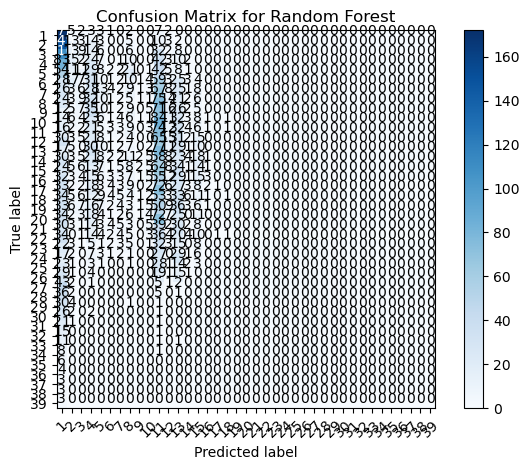

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(y_test_2011)
display(X_rf_pred_2011)

print("Confusion Matrix:")
print(confusion_matrix(y_test_2011, X_rf_pred_2011))
print()

print("Accuracy: {}".format(accuracy_score(y_test_2011, X_rf_pred_2011)))

# Compute confusion matrix
cm = confusion_matrix(y_test_2011, X_rf_pred_2011)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

In [ ]:
import numpy as np

# Angenommen, X_test_1950 ist ein numpy Array und die letzte Spalte enthält die max_drivers
# Extrahiere die max_drivers-Spalte aus X_test_1950
max_drivers = X_test_2011[:, -1]

# Konvertiere die Vorhersagen zu einem numpy Array, falls sie es nicht bereits sind
predictions = np.array(X_rf_pred_2011)

# Zähle die Vorhersagen, die größer sind als die maximale Anzahl an Fahrern
out_of_bounds_count = np.sum(predictions > max_drivers)

# Ausgabe der Anzahl der Vorhersagen außerhalb des Rasters
print(f"Anzahl der Vorhersagen außerhalb des Rasters: {out_of_bounds_count}")

Anzahl der Vorhersagen außerhalb des Rasters: 0


baseline hat RMSE von 4,9 lul

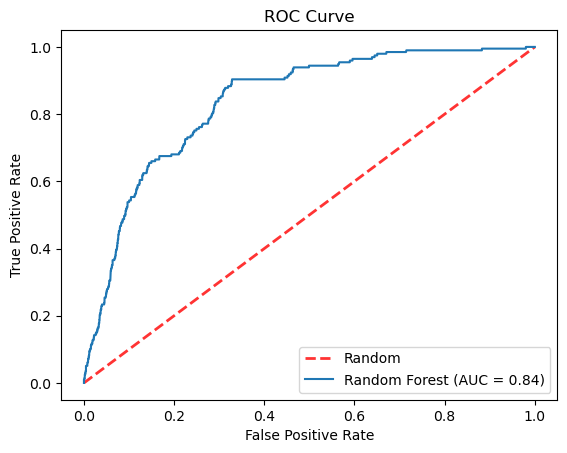

Thresholds: [       inf 0.07503178 0.07475725 ... 0.02745452 0.02732633 0.02729198]


In [ ]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Klassenwahrscheinlichkeiten (Confidences) für das Test-Set
proba_for_each_class = random_forest.predict_proba(X_test_2011)

# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test_2011, proba_for_each_class[:, 1], pos_label=1)

# Berechne die AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot die Linie für zufälliges Raten
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot die ROC-Kurve für den Classifier
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Zeige den Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zeige die Schwellenwerte
print("Thresholds:", thresholds)

In [ ]:
#RMSE for XG- Boost
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_xg_2011 = mean_squared_error(y_test_2011, X_pred_xg_2011)
print("Mean Squared Error:", x_mse_xg_2011)
print("Root Mean Squared Error:", sqrt(x_mse_xg_2011))

#RMSE for XGB with Successive Halving
x_mse_xg_sh_2011 = mean_squared_error(y_test_2011, X_xgb_sh_pred_2011)
print("Mean Squared Error SH:", x_mse_xg_sh_2011)
print("Root Mean Squared Error SH:", sqrt(x_mse_xg_sh_2011))

#RMSE for XG-Boost with Random Search
x_mse_xg_rs_2011= mean_squared_error(y_test_2011, X_xgb_rs_pred_2011)
print("Mean Squared Error RS:", x_mse_xg_rs_2011)
print("Root Mean Squared Error RS:", sqrt(x_mse_xg_rs_2011))
#Best


Mean Squared Error: 62.584019769357496
Root Mean Squared Error: 7.9110062425305605
Mean Squared Error SH: 61.35152388797364
Root Mean Squared Error SH: 7.832721359015246
Mean Squared Error RS: 59.02944810543657
Root Mean Squared Error RS: 7.683062417124865


## Ensembles

In [ ]:
#Dauert 65 Min und 45 sek

#Stacking Example for XG-Boost and Random Forrest

from sklearn.tree import DecisionTreeClassifier #Meta Learner
from sklearn.preprocessing import LabelEncoder

# Stacking: scikit-learn has no implementation for Stacking. You can use this -> https://rasbt.gith2ub.io/mlxtend/
# HINT: mlxtend can only work with numerical labels. You can use the LabelEncoder to transform your labels.

from mlxtend.classifier import StackingClassifier
#Pick the the two best classifiers with best found hyperparameters
estimators = {'RandomForrest with Successive Halving': rsh_rf_1950, 'XG Boost Classifier with Halving Random Search': random_search} #Possible to extend to even more classifiers

ensemble = StackingClassifier(
    classifiers=list(estimators.values()),
    meta_classifier=DecisionTreeClassifier()
)
estimators['Stacking'] = ensemble

for e_name, e in estimators.items():
    evaluate_classifier(e_name, e, X_train_1950, y_train_1950, X_test_1950, y_test_1950)

RandomForrest with Successive Halving: ACC=0.10 RandomForrest with Successive Halving: RMSE=7.62
XG Boost Classifier with Halving Random Search: ACC=0.09 XG Boost Classifier with Halving Random Search: RMSE=7.68


/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Stacking: ACC=0.09 Stacking: RMSE=7.70


Keine Verbesserung --> Verscuh einer LogisticRegression oder GradientBoostingClassifier

Vielleicht Overfitten bzw Underfitten meine Modelle auch 

Hyperparameter optimization des Ensembles, 

# Ensembles

Let the different models vote for final prediction.

Possabilities: 
Stacking,
Voting

## Stacking

Logistic Regression als finaler Classifier 

Erstellen eines Dataframe aus den predictions der Classifier auf dem Train Daten Satz

### Preprocessing

In [959]:
X_train = pd.read_csv('../data/train/train.csv')
y_train = pd.read_csv('../data/train/train_labels.csv')

X_test = pd.read_csv('../data/test/test.csv')
y_test = pd.read_csv('../data/test/test_labels.csv')

In [960]:
from datetime import datetime

#Calculate Age for Train: 
X_train['race_date'] = pd.to_datetime(X_train['race_date'])
X_train['driver_dob'] = pd.to_datetime(X_train['driver_dob'])

X_train['age'] = X_train.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train = X_train.drop(columns=['driver_dob'])
X_train = X_train.drop(columns=['race_date'])

# Calculate Age for Test
X_test['race_date'] = pd.to_datetime(X_test['race_date'])
X_test['driver_dob'] = pd.to_datetime(X_test['driver_dob'])

X_test['age'] = X_test.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test = X_test.drop(columns=['driver_dob'])
X_test = X_test.drop(columns=['race_date'])

In [961]:
X_train = impute_times(X_train)
X_test = impute_times(X_test)

X_train = X_train.apply(lambda x: x.apply(n_to_nan))
X_test = X_test.apply(lambda x: x.apply(n_to_nan))

X_train["q1"] = X_train["q1"].apply(race_time_to_milliseconds)
X_train["q2"] = X_train["q2"].apply(race_time_to_milliseconds)
X_train["q3"] = X_train["q3"].apply(race_time_to_milliseconds)

X_test["q1"] = X_test["q1"].apply(race_time_to_milliseconds)
X_test["q2"] = X_test["q2"].apply(race_time_to_milliseconds)
X_test["q3"] = X_test["q3"].apply(race_time_to_milliseconds)

In [962]:
columns_to_drop = ['resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date', 'fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [963]:
# Drop the 'driver_nationality' column from both train and test datasets
X_train = X_train.drop(columns=['driver_nationality'])
X_test = X_test.drop(columns=['driver_nationality'])


In [964]:
#Encodeing 
#object_columns = X_train.select_dtypes(include=['object']).columns

#from sklearn import preprocessing

#encoderOH = preprocessing.OneHotEncoder(handle_unknown='ignore')
#encoded_train = pd.DataFrame(encoderOH.fit_transform(X_train[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))
#encoded_test = pd.DataFrame(encoderOH.transform(X_test[object_columns]).toarray(), columns=encoderOH.get_feature_names_out(object_columns))

# Drop original object columns and join encoded columns
#X_train = X_train.drop(columns=object_columns).join(encoded_train)
#X_test = X_test.drop(columns=object_columns).join(encoded_test)

In [965]:
object_columns

Index([], dtype='object')

In [966]:
X_train.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,q_position,fp1_avg_sector_1,fp1_avg_sector_2,fp1_avg_lap_time,fp1_avg_speedI1,fp1_avg_speedI2,fp1_avg_speedFL,fp1_avg_speedST,fp1_avg_tyre_life,fp1_avg_is_on_fresh_tyres,fp2_avg_sector_1,fp2_avg_sector_2,fp2_avg_lap_time,fp2_avg_speedI1,fp2_avg_speedI2,fp2_avg_speedFL,fp2_avg_speedST,fp2_avg_tyre_life,fp2_avg_is_on_fresh_tyres,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres,age
0,235,6,11,1973,3,30,-25.9894,28.07670,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,17,9,6,2010,1,3,26.0325,50.51060,7,115298.0,114318.0,115284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
2,640,105,9,1953,9,14,45.6156,9.28111,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
3,813,3,8,2011,6,6,43.7347,7.42056,7,75819.0,75545.0,76528.0,25687.0,26468.0,26077.5,552.250396,2.0,2.0,25.0,54.0,39.5,20.506097,22356.805444,48638.57573,78966.203597,23493.582866,21056.7,21056.7,30185.1,21292.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
4,791,6,25,1950,7,14,45.6156,9.28111,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52


#### Modell 1

In [967]:
#Modell 1
columns_to_drop = ['q1', 'q2','q3']

X_train_ensemble_2018 = X_train.drop(columns=columns_to_drop)
X_test_ensemble_2018 = X_test.drop(columns=columns_to_drop)

In [968]:
X_train_ensemble_2018.shape

(21359, 59)

#### Modell 2

In [969]:
# Füge die Zielvariable zu den Features hinzu
X_train = X_train.join(y_train)
X_test= X_test.join(y_test)

# Kombiniere die Trainings- und Testdaten
X_combined = pd.concat([X_train, X_test], keys=['train', 'test'])

# Bestimme die maximale Anzahl an Fahrern pro Jahr
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Füge das neue Attribut zu den kombinierten Daten hinzu
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Splitte die kombinierten Daten wieder in Trainings- und Testdatensätze
X_train = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Entferne die 'positionOrder'-Spalte aus den Features
X_train = X_train.drop(columns=['positionOrder'])
X_test = X_test.drop(columns=['positionOrder'])

# Ausgabe zur Überprüfung
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)

X_train:
       driverId  constructorId  grid  year  round  circuitId  race_lat  \
0           235              6    11  1973      3         30  -25.9894   
1            17              9     6  2010      1          3   26.0325   
2           640            105     9  1953      9         14   45.6156   
3           813              3     8  2011      6          6   43.7347   
4           791              6    25  1950      7         14   45.6156   
...         ...            ...   ...   ...    ...        ...       ...   
21354        20              9     3  2014      4         17   31.3389   
21355        33             13    18  2006      9          7   45.5000   
21356       774            154    13  1950      5         13   50.4372   
21357       222              1     8  1972     12         46   42.3369   
21358         8            208     5  2012     16         35   34.7333   

        race_lng  race_alt        q1        q2        q3  \
0       28.07670      1460       NaN      

In [970]:

#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_ensemble_2011 = X_train.drop(columns=X_train.loc[:, 'q_position':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_ensemble_2011 = X_test.drop(columns=X_test.loc[:, 'q_position':'fp3_avg_is_on_fresh_tyres'].columns)

In [971]:
# Teste, ob alle Spalten von X_train_ensemble_2003 in X_train_2003 vorhanden sind
missing_columns = [col for col in X_test_ensemble_2011.columns if col not in pd.DataFrame(X_test_2011).columns]

if not missing_columns:
    print("Alle Spalten von X_test_ensemble_2003 sind in X_test_2003 vorhanden.")
else:
    print("Die folgenden Spalten fehlen in X_train_2003:", missing_columns)

Alle Spalten von X_test_ensemble_2003 sind in X_test_2003 vorhanden.


In [972]:
X_test_2011.shape

(1177, 35)

In [973]:
X_test_ensemble_2011.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,min_pit_stop_duration,max_pit_stop_duration,avg_pit_stop_duration,std_pit_stop_duration,milliseconds_count,pit_stop_count,min_pit_stop_lap,max_pit_stop_lap,avg_pit_stop_lap,std_pit_stop_lap,avg_pit_stop_driver,avg_pit_stop_team,avg_pit_stop_track,avg_pit_stop_season,rolling_avg_pit_stop_driver,rolling_avg_pit_stop_team,rolling_avg_pit_stop_track,rolling_avg_pit_stop_season,q1_time,q2_time,q3_time,age,max_drivers
0,233,34,19,1977,13,39,52.3888,4.54092,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,36
1,182,1,12,1983,15,30,-25.9894,28.07670,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,29
2,852,213,15,2023,7,4,41.5700,2.26111,109,73862.0,74477.0,NaN,22009.0,22176.0,22092.5,118.086832,2.0,2.0,10.0,34.0,22.0,16.970563,240218.586397,185744.145248,22457.888282,185098.548387,23458.6,23458.6,22641.1,475732.8,73862.0,74477.0,NaN,23,20
3,627,6,14,1954,1,25,-34.6943,-58.45930,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,33
4,94,35,15,1992,5,21,44.3439,11.71670,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,32


#### Modell 3

In [974]:
#Modell 3
#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_ensemble_2003 = X_train.drop(columns=X_train.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_ensemble_2003 = X_test.drop(columns=X_test.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)

In [975]:
# Teste, ob alle Spalten von X_train_ensemble_2003 in X_train_2003 vorhanden sind
missing_columns = [col for col in X_test_ensemble_2003.columns if col not in pd.DataFrame(X_test_2003).columns]

if not missing_columns:
    print("Alle Spalten von X_train_ensemble_2003 sind in X_train_2003 vorhanden.")
else:
    print("Die folgenden Spalten fehlen in X_train_2003:", missing_columns)

Alle Spalten von X_train_ensemble_2003 sind in X_train_2003 vorhanden.


In [976]:
X_test_2003.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,age,max_drivers
0,852,213,15,2023,7,4,41.5700,2.26111,109,73862.0,74477.0,74477.0,23,20
1,15,7,3,2005,16,13,50.4372,5.97139,401,106596.0,106596.0,106596.0,31,20
2,27,18,18,2005,9,19,39.7950,-86.23470,223,73632.0,73632.0,73632.0,26,20
3,17,3,14,2005,8,7,45.5000,-73.52280,13,77749.0,77749.0,77749.0,28,20
4,39,164,24,2011,3,17,31.3389,121.22000,5,100445.0,100445.0,100445.0,34,24


In [977]:
X_test_ensemble_2003.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,q1,q2,q3,age,max_drivers
0,233,34,19,1977,13,39,52.3888,4.54092,6,NaN,NaN,NaN,26,36
1,182,1,12,1983,15,30,-25.9894,28.07670,1460,NaN,NaN,NaN,34,29
2,852,213,15,2023,7,4,41.5700,2.26111,109,73862.0,74477.0,NaN,23,20
3,627,6,14,1954,1,25,-34.6943,-58.45930,8,NaN,NaN,NaN,48,33
4,94,35,15,1992,5,21,44.3439,11.71670,37,NaN,NaN,NaN,31,32


#### Modell 4

In [978]:
#Modell 4
# Drop specified columns from train and test datasets
#droppe bitte alle zeilen von min_pit_stop_duration bis fp3_avg_is_on_fresh_tyres
X_train_ensemble_1950 = X_train.drop(columns=X_train.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_ensemble_1950 = X_test.drop(columns=X_test.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)

#Modell 1
columns_to_drop = ['q1', 'q2','q3']

X_train_ensemble_1950 = X_train_ensemble_1950.drop(columns=columns_to_drop)
X_test_ensemble_1950 = X_test_ensemble_1950.drop(columns=columns_to_drop)

In [979]:
X_train_ensemble_1950.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age,max_drivers
0,235,6,11,1973,3,30,-25.9894,28.07670,1460,28,29
1,17,9,6,2010,1,3,26.0325,50.51060,7,33,24
2,640,105,9,1953,9,14,45.6156,9.28111,162,39,34
3,813,3,8,2011,6,6,43.7347,7.42056,7,26,24
4,791,6,25,1950,7,14,45.6156,9.28111,162,52,33


In [980]:
X_train_1950.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age,max_drivers
0,235,6,11,1973,3,30,-25.9894,28.07670,1460,28,29
1,17,9,6,2010,1,3,26.0325,50.51060,7,33,24
2,640,105,9,1953,9,14,45.6156,9.28111,162,39,34
3,813,3,8,2011,6,6,43.7347,7.42056,7,26,24
4,791,6,25,1950,7,14,45.6156,9.28111,162,52,33


In [981]:
# Teste, ob alle Spalten von X_train_ensemble_2003 in X_train_2003 vorhanden sind
missing_columns = [col for col in X_train_ensemble_1950.columns if col not in pd.DataFrame(X_train_1950).columns]

if not missing_columns:
    print("Alle Spalten von X_train_ensemble_1950 sind in X_train_1950 vorhanden.")
else:
    print("Die folgenden Spalten fehlen in X_train_1950:", missing_columns)

Alle Spalten von X_train_ensemble_1950 sind in X_train_1950 vorhanden.


In [982]:
# Classifier 2003 rsh_rf_2003
# Classifier 2011 random_search
# Classifier 2018 random_search2018
#Classifier 1950  random_search1950

#Predicte auf dem jeweiligen trainseet
ensemble_pred_2003 = random_search.predict(X_train_ensemble_2003)
ensemble_pred_2011 = random_search2011.predict(X_train_ensemble_2011)
ensemble_pred_2018 = random_search2018.predict(X_train_ensemble_2018)
ensemble_pred_1950 = random_search1950.predict(X_train_ensemble_1950)

#Creation of a Dataframe with the predictions
ensemble_df = pd.DataFrame({'2003': ensemble_pred_2003, '2011': ensemble_pred_2011, '2018': ensemble_pred_2018, '1950': ensemble_pred_1950})

#Predicte auf jeweiligen test set
ensemble_pred_test_2003 = random_search.predict(X_test_ensemble_2003)
ensemble_pred_test_2011 = random_search2011.predict(X_test_ensemble_2011)
ensemble_pred_test_2018 = random_search2018.predict(X_test_ensemble_2018)
ensemble_pred_test_1950 = random_search1950.predict(X_test_ensemble_1950)

ensemble_df_test = pd.DataFrame({'2003': ensemble_pred_test_2003, '2011': ensemble_pred_test_2011, '2018': ensemble_pred_test_2018, '1950': ensemble_pred_test_1950})


In [983]:
# Merge the original dataset X_train_ensemble_1950 with ensemble_df for training data
ensemble_df_train_full = pd.concat([ensemble_df, X_train_ensemble_1950], axis=1)

# Merge the original dataset X_test_ensemble_1950 with ensemble_df_test for test data
ensemble_df_test_full = pd.concat([ensemble_df_test, X_test_ensemble_1950], axis=1)

ensemble_df_train_full.head()



,2003,2011,2018,1950,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age,max_drivers
0,10,21,18,17,235,6,11,1973,3,30,-25.9894,28.07670,1460,28,29
1,3,21,18,17,17,9,6,2010,1,3,26.0325,50.51060,7,33,24
2,10,19,18,17,640,105,9,1953,9,14,45.6156,9.28111,162,39,34
3,4,10,15,17,813,3,8,2011,6,6,43.7347,7.42056,7,26,24
4,20,19,18,17,791,6,25,1950,7,14,45.6156,9.28111,162,52,33


In [984]:
pd.DataFrame(ensemble_df_test_full).shape

(5340, 15)

In [985]:
label_encoder = preprocessing.LabelEncoder().fit(y_train)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [986]:
# Train a new classifier on the predictions with a soft mark regression
from sklearn.ensemble import RandomForestRegressor

# Initialisiere den XGBoost Classifier
ens_xgb = RandomForestRegressor(random_state=42)

# Trainiere den Classifier
ens_xgb.fit(ensemble_df_train_full, y_train)

# Vorhersagen auf dem Test-Set
ens_xgb_pred = ens_xgb.predict(ensemble_df_test_full)

# Ausgabe der Vorhersagen zur Überprüfung
print(ens_xgb_pred)

[13.44 12.68 13.37 ...  7.64 13.32 16.73]


In [987]:
#RMSE für Ensemble log_reg_pred
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_ensemble = mean_squared_error(y_test, ens_xgb_pred)
print("Mean Squared Error:", x_mse_ensemble)
print("Root Mean Squared Error:", sqrt(x_mse_ensemble))

Mean Squared Error: 33.850023426966295
Root Mean Squared Error: 5.818077296406975


In [989]:
# Add log_dt_pred to ensemble_df_test for comparison
ensemble_df_test_full = ensemble_df_test_full.copy()
ensemble_df_test_full['log_dt_pred'] = ens_xgb_pred

# Display the updated DataFrame
ensemble_df_test_full.head()

,2003,2011,2018,1950,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age,max_drivers,log_dt_pred
0,13,19,18,17,233,34,19,1977,13,39,52.3888,4.54092,6,26,36,13.44
1,10,21,18,17,182,1,12,1983,15,30,-25.9894,28.07670,1460,34,29,12.68
2,18,11,8,17,852,213,15,2023,7,4,41.5700,2.26111,109,23,20,13.37
3,10,19,18,17,627,6,14,1954,1,25,-34.6943,-58.45930,8,48,33,11.13
4,13,19,18,17,94,35,15,1992,5,21,44.3439,11.71670,37,31,32,10.99


achtung vor interrcorrelation